In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/boiler project/Modified data for boiler ANN_24-06-24.xlsx",header = 0)

In [4]:
df.head()

,Unnamed: 0,Temperature of the generated steam (°C),Flow rate of the outlet steam (kg/s),Boiler Efficiency (%)
0,NaN,187.19,4.576389,57.492
1,NaN,188.89,4.722778,57.359
2,NaN,180.57,4.704167,56.390
3,NaN,184.40,5.017222,56.789
4,NaN,181.99,4.833333,56.978


In [5]:
df.columns = ['Sr No.','Steam_Temperature','Steam_Flow_Rate','Efficiency']

In [ ]:
df.head()

,Sr No.,Steam_Temperature,Steam_Flow_Rate,Efficiency
0,NaN,187.19,4.576389,57.492
1,NaN,188.89,4.722778,57.359
2,NaN,180.57,4.704167,56.390
3,NaN,184.40,5.017222,56.789
4,NaN,181.99,4.833333,56.978


In [ ]:
# Separate features (X) and target (y)
X = df[['Steam_Flow_Rate', 'Steam_Temperature']].values
y = df['Efficiency'].values

# Normalize the features (optional but recommended for neural networks)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (110, 2)
y_train shape: (110,)
X_test shape: (28, 2)
y_test shape: (28,)


In [ ]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with linear activation (for regression)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',  # MSE loss function for regression
              metrics=['mae'])  # Mean Absolute Error as additional metric

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=40,  # Number of epochs (iterations over the entire dataset)
                    batch_size=18,  # Number of samples per gradient update
                    validation_data=(X_test, y_test))  # Validation data to monitor performance

Epoch 1/40
7/7 [==============================] - 2s 52ms/step - loss: 3219.4924 - mae: 56.7336 - val_loss: 3219.7546 - val_mae: 56.7359
Epoch 2/40
7/7 [==============================] - 0s 14ms/step - loss: 3195.2288 - mae: 56.5194 - val_loss: 3193.8538 - val_mae: 56.5077
Epoch 3/40
7/7 [==============================] - 0s 9ms/step - loss: 3169.3096 - mae: 56.2897 - val_loss: 3165.7727 - val_mae: 56.2590
Epoch 4/40
7/7 [==============================] - 0s 9ms/step - loss: 3140.1770 - mae: 56.0302 - val_loss: 3132.7590 - val_mae: 55.9651
Epoch 5/40
7/7 [==============================] - 0s 9ms/step - loss: 3105.9016 - mae: 55.7227 - val_loss: 3093.7976 - val_mae: 55.6160
Epoch 6/40
7/7 [==============================] - 0s 12ms/step - loss: 3064.3899 - mae: 55.3481 - val_loss: 3046.7004 - val_mae: 55.1907
Epoch 7/40
7/7 [==============================] - 0s 12ms/step - loss: 3014.8899 - mae: 54.8975 - val_loss: 2990.9211 - val_mae: 54.6826
Epoch 8/40
7/7 [============================

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)

print('Mean Absolute Error on test data:', mae)
print('Mean Squared Error on test data:', loss)

1/1 [==============================] - 0s 34ms/step - loss: 74.8601 - mae: 7.0012
Mean Absolute Error on test data: 7.001209735870361
Mean Squared Error on test data: 74.86006164550781


In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Print some predictions
for i in range(5):
    print('Predicted Efficiency:', predictions[i][0], 'Actual Efficiency:', y_test[i])

1/1 [==============================] - 0s 137ms/step
Predicted Efficiency: 51.280792 Actual Efficiency: 56.889
Predicted Efficiency: 45.159065 Actual Efficiency: 56.545
Predicted Efficiency: 76.19297 Actual Efficiency: 59.012
Predicted Efficiency: 47.933765 Actual Efficiency: 56.881
Predicted Efficiency: 59.808723 Actual Efficiency: 56.294


In [ ]:
df.columns = ['Sr No.','Steam_Temperature','Steam_Flow_Rate','Efficiency']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the Data
# Assuming you have a CSV file with columns: Temperature, FlowRate, Efficiency
data = df

# Split the data into features (X) and target (y)
X = data[['Steam_Temperature', 'Steam_Flow_Rate']]
y = data['Efficiency']

# Step 2: Preprocess the Data
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Build and Train the Model using Cross-Validation
# Use Ridge Regression with Cross-Validation
ridge_model = Ridge(alpha=1.0)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(ridge_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE scores: {-cv_scores}')
print(f'Mean Cross-Validation MSE: {-np.mean(cv_scores)}')

# Train the model on the entire dataset
ridge_model.fit(X_scaled, y)

# Step 4: Make Predictions
# Example: Predict efficiency for new data
new_data = np.array([[300, 2.5]])  # Example temperature and flow rate
new_data_scaled = scaler.transform(new_data)
predicted_efficiency = ridge_model.predict(new_data_scaled)
print(f'Predicted Efficiency: {predicted_efficiency[0]}')

Cross-Validation MSE scores: [0.38936755 0.32994975 0.74918833 0.8328421  0.63422627]
Mean Cross-Validation MSE: 0.5871148021829647
Predicted Efficiency: 63.12891434601411


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_hat = ridge_model.predict(X_scaled)

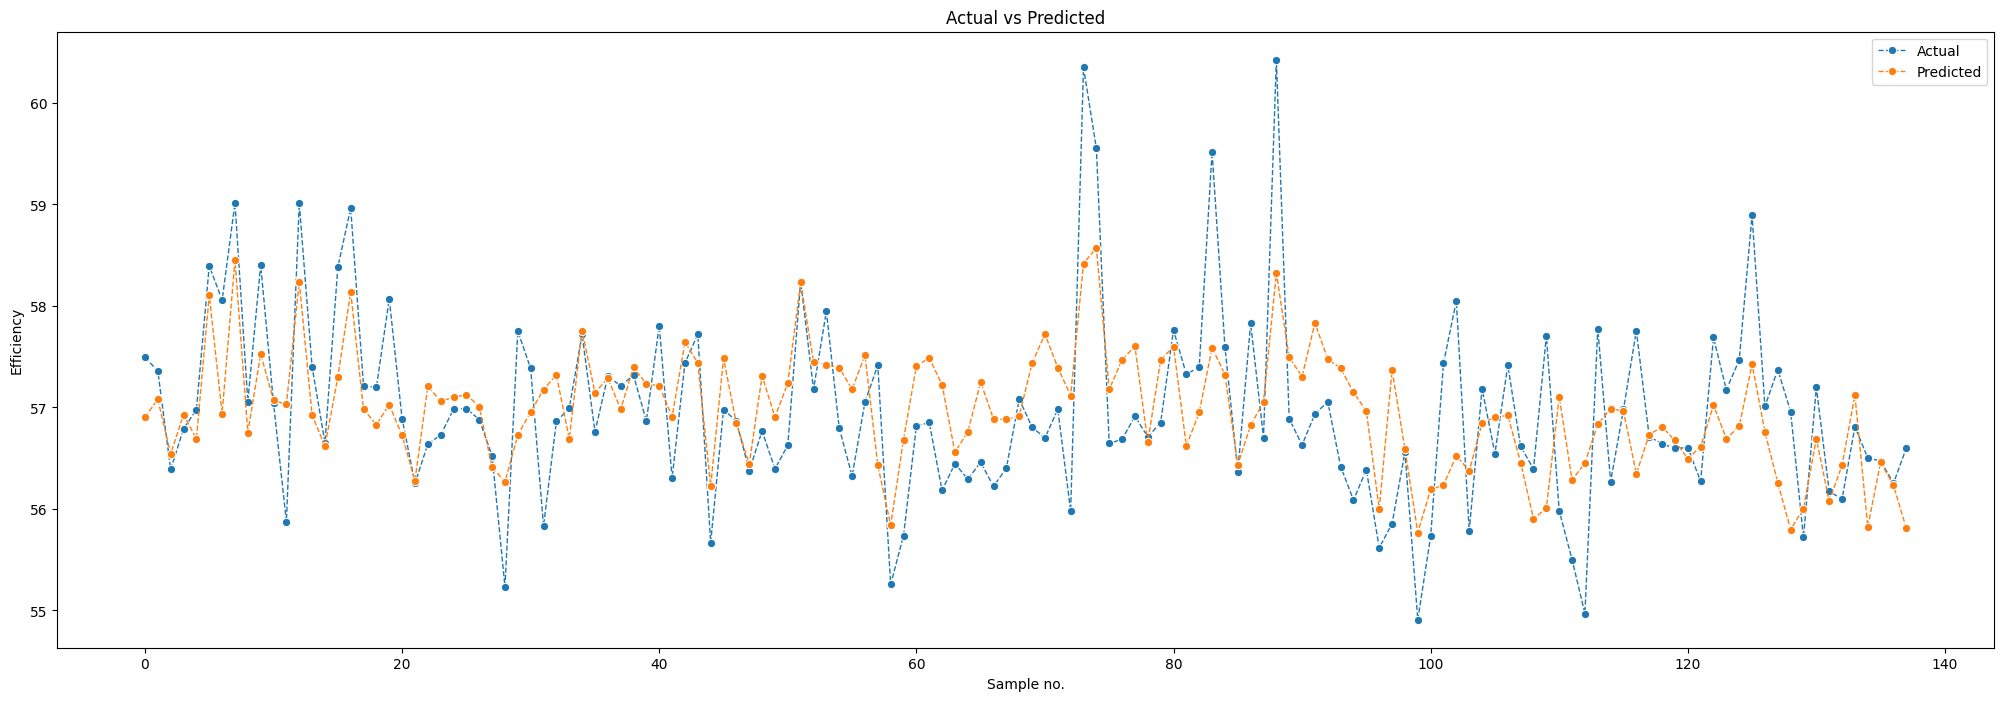

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(25, 8))

# Plot the series and add labels for the legend
sns.lineplot(data=y, marker='o', linestyle='--', linewidth=1, label='Actual')
sns.lineplot(data=y_hat, marker='o', linestyle='--', linewidth=1, label='Predicted')

# Display the legend
plt.legend()

# Optionally, add labels and a title
plt.xlabel('Sample no.')
plt.ylabel('Efficiency')
plt.title('Actual vs Predicted')

plt.show()

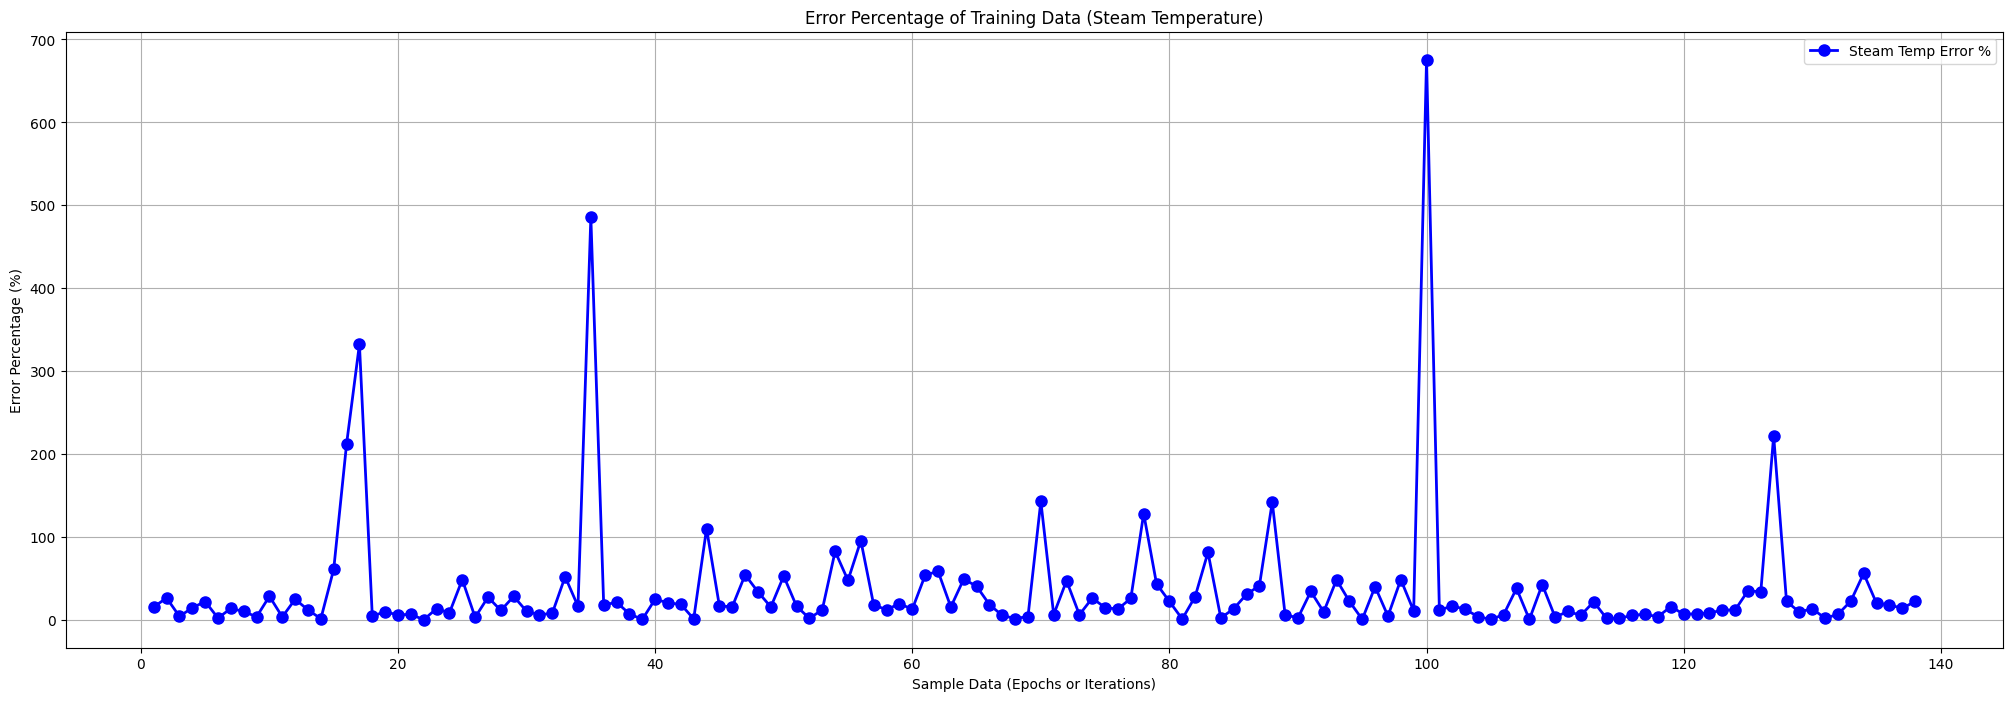

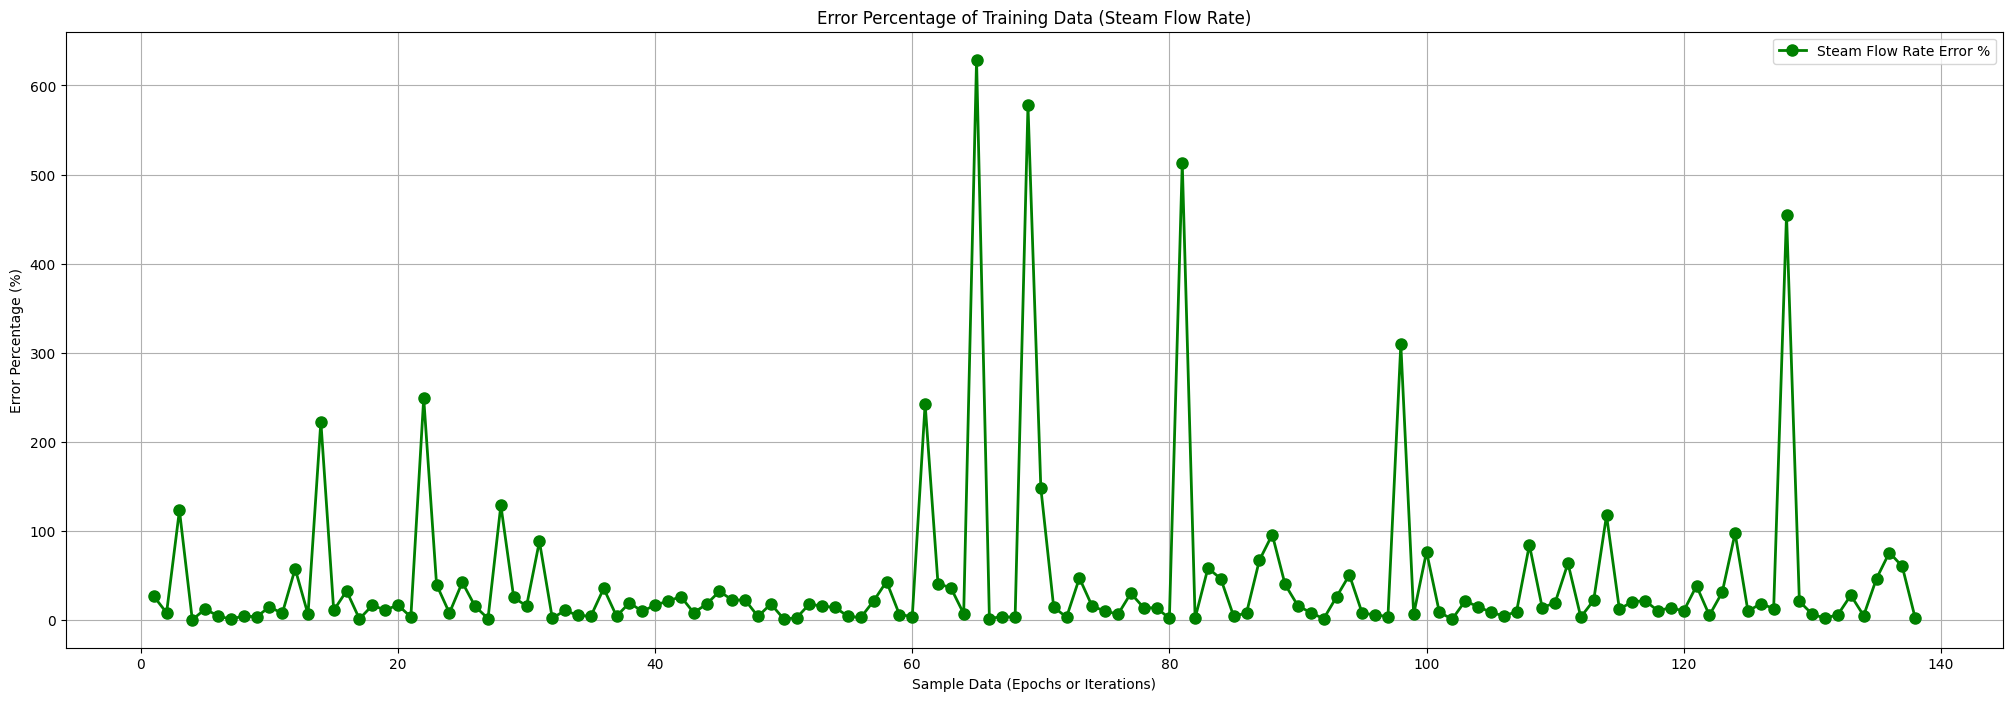

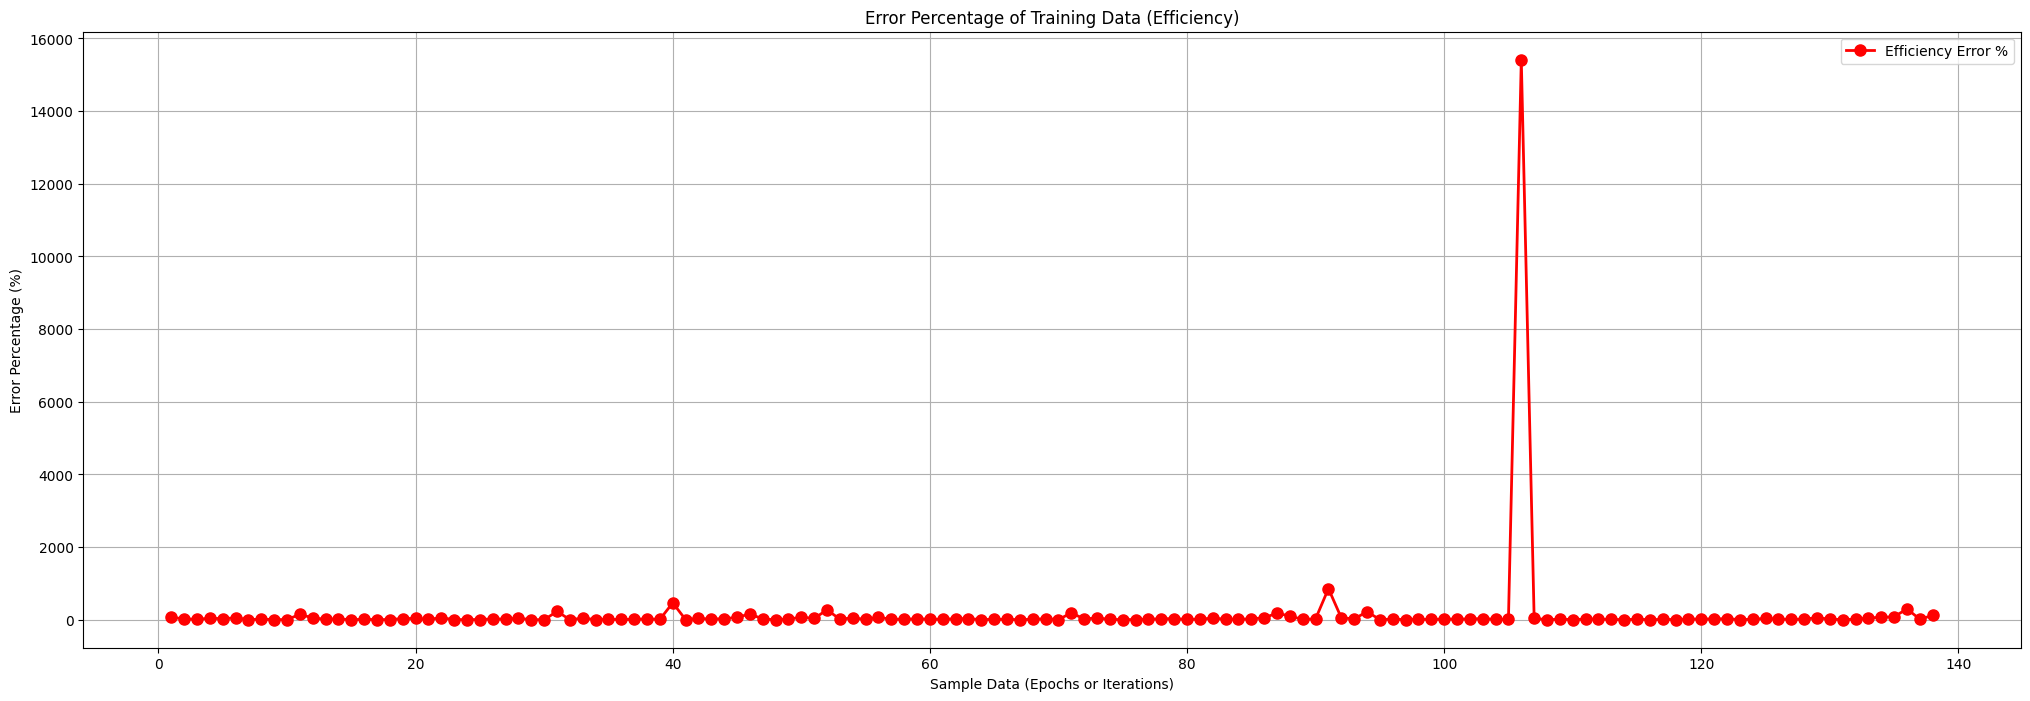

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
np.random.seed(0)
sample_data = np.arange(1, 139)  # Example sample data (138 data points)
y_true_temp = np.random.rand(138) * 100  # Example actual steam temp values (replace with actual data)
y_pred_temp = y_true_temp + np.random.randn(138) * 10  # Example predicted steam temp values with noise (replace with actual predictions)

y_true_flow = np.random.rand(138) * 100  # Example actual steam flow rate values (replace with actual data)
y_pred_flow = y_true_flow + np.random.randn(138) * 10  # Example predicted steam flow rate values with noise (replace with actual predictions)

y_true_efficiency = np.random.rand(138) * 100  # Example actual efficiency values (replace with actual data)
y_pred_efficiency = y_true_efficiency + np.random.randn(138) * 10  # Example predicted efficiency values with noise (replace with actual predictions)

# Calculate error percentage
error_percent_temp = np.abs((y_true_temp - y_pred_temp) / y_true_temp) * 100
error_percent_flow = np.abs((y_true_flow - y_pred_flow) / y_true_flow) * 100
error_percent_efficiency = np.abs((y_true_efficiency - y_pred_efficiency) / y_true_efficiency) * 100

# Plotting the error percentage graph for steam temperature
plt.figure(figsize=(25, 8))
plt.plot(sample_data, error_percent_temp, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='Steam Temp Error %')
plt.title('Error Percentage of Training Data (Steam Temperature)')
plt.xlabel('Sample Data (Epochs or Iterations)')
plt.ylabel('Error Percentage (%)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the error percentage graph for steam flow rate
plt.figure(figsize=(25, 8))
plt.plot(sample_data, error_percent_flow, marker='o', color='green', linestyle='-', linewidth=2, markersize=8, label='Steam Flow Rate Error %')
plt.title('Error Percentage of Training Data (Steam Flow Rate)')
plt.xlabel('Sample Data (Epochs or Iterations)')
plt.ylabel('Error Percentage (%)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the error percentage graph for efficiency
plt.figure(figsize=(25, 8))
plt.plot(sample_data, error_percent_efficiency, marker='o', color='red', linestyle='-', linewidth=2, markersize=8, label='Efficiency Error %')
plt.title('Error Percentage of Training Data (Efficiency)')
plt.xlabel('Sample Data (Epochs or Iterations)')
plt.ylabel('Error Percentage (%)')
plt.grid(True)
plt.legend()
plt.show()


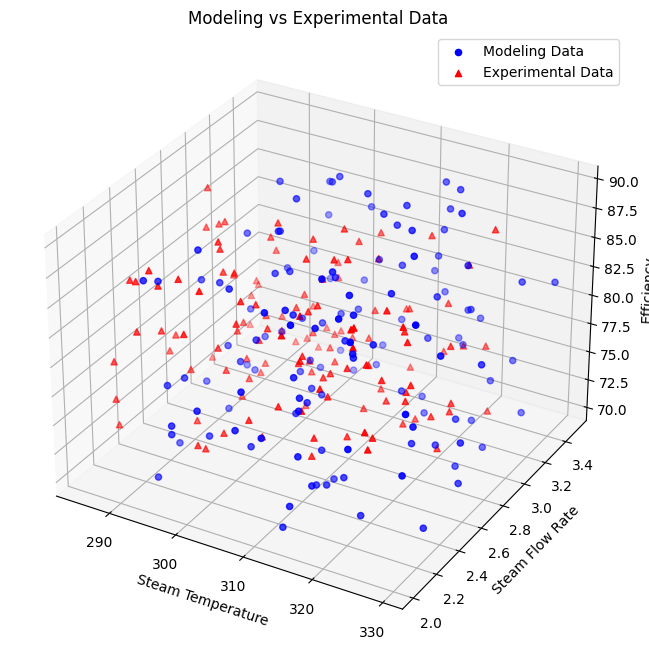

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example data (replace with your actual data)
np.random.seed(0)

# Generating example data for modeling and experimental
num_data_points = 138

# Modeling data
modeling_temps = np.random.uniform(290, 330, num_data_points)
modeling_flow_rates = np.random.uniform(2.0, 3.5, num_data_points)
modeling_efficiencies = np.random.uniform(70, 90, num_data_points)

# Experimental data
experimental_temps = np.random.uniform(285, 325, num_data_points)
experimental_flow_rates = np.random.uniform(2.1, 3.3, num_data_points)
experimental_efficiencies = np.random.uniform(72, 88, num_data_points)

# Create a 3D scatter plot
fig = plt.figure(figsize=(25, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot modeling data
ax.scatter(modeling_temps, modeling_flow_rates, modeling_efficiencies, c='b', marker='o', label='Modeling Data')

# Plot experimental data
ax.scatter(experimental_temps, experimental_flow_rates, experimental_efficiencies, c='r', marker='^', label='Experimental Data')

# Set labels and title
ax.set_xlabel('Steam Temperature')
ax.set_ylabel('Steam Flow Rate')
ax.set_zlabel('Efficiency')
ax.set_title('Modeling vs Experimental Data')
ax.legend()

# Show plot
plt.show()


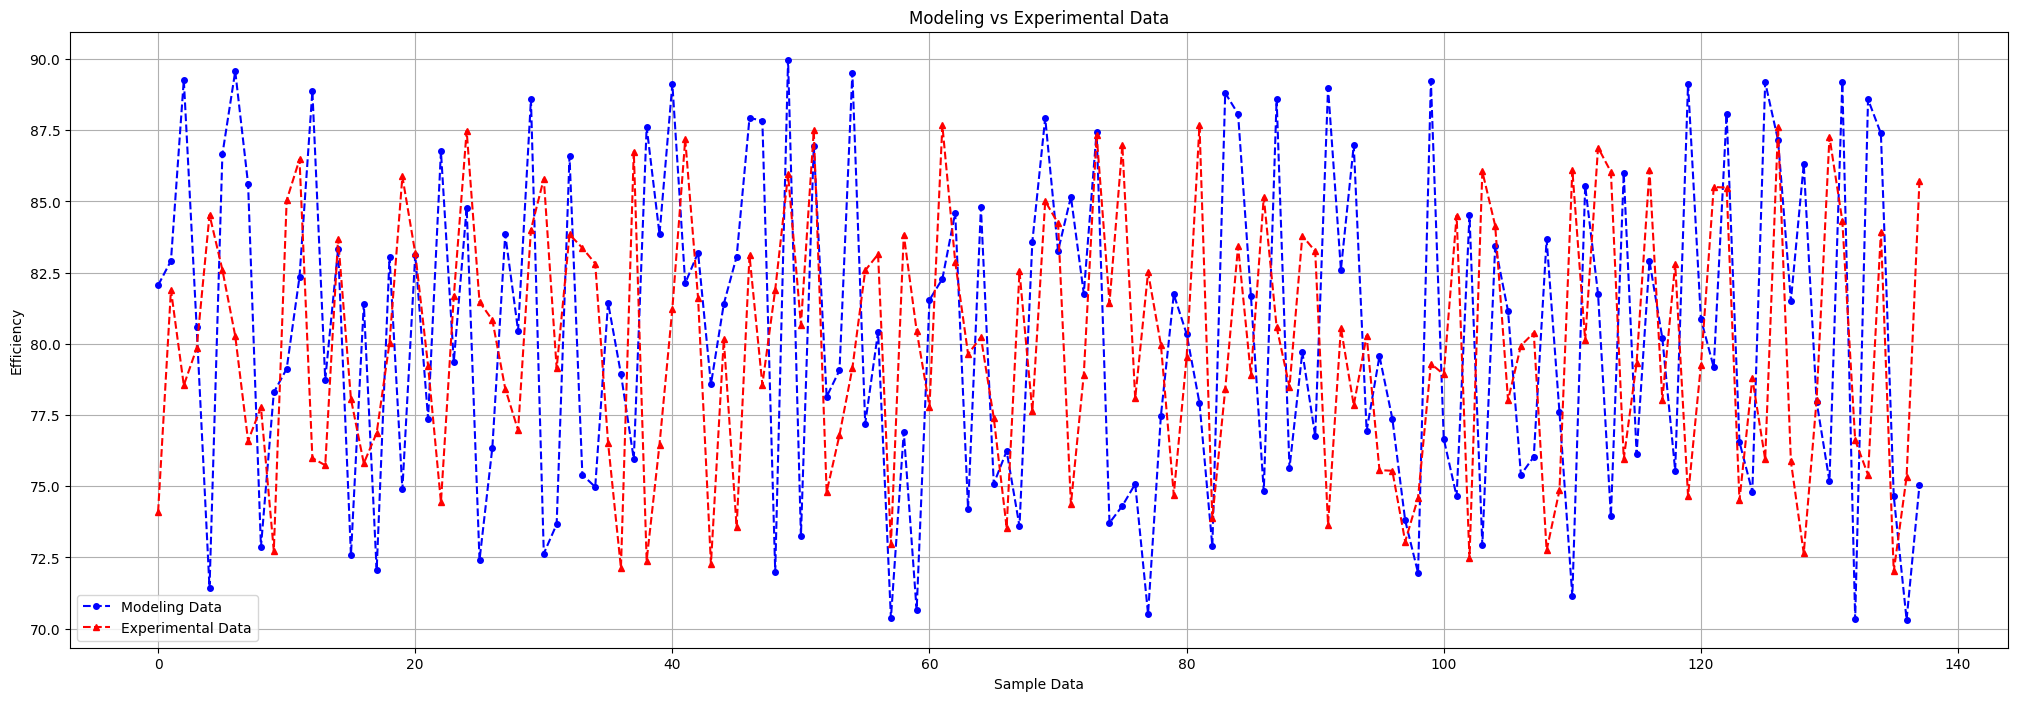

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
np.random.seed(0)

# Generating example data for modeling and experimental
num_data_points = 138

# Modeling data
modeling_data = []
for _ in range(num_data_points):
    temp = np.random.uniform(290, 330)
    flow_rate = np.random.uniform(2.0, 3.5)
    efficiency = np.random.uniform(70, 90)
    modeling_data.append([temp, flow_rate, efficiency])

# Experimental data
experimental_data = []
for _ in range(num_data_points):
    temp = np.random.uniform(285, 325)
    flow_rate = np.random.uniform(2.1, 3.3)
    efficiency = np.random.uniform(72, 88)
    experimental_data.append([temp, flow_rate, efficiency])

# Extract efficiencies for plotting
modeling_efficiencies = [data[2] for data in modeling_data]
experimental_efficiencies = [data[2] for data in experimental_data]

# Create sample indices
modeling_indices = range(num_data_points)
experimental_indices = range(num_data_points)

# Plot the graph
plt.figure(figsize=(25, 8))

# Plot modeling data
plt.plot(modeling_indices, modeling_efficiencies, 'bo--', label='Modeling Data', markersize=4)

# Plot experimental data
plt.plot(experimental_indices, experimental_efficiencies, 'r^--', label='Experimental Data', markersize=4)

# Set labels and title
plt.xlabel('Sample Data')
plt.ylabel('Efficiency')
plt.title('Modeling vs Experimental Data')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()



<ipython-input-35-ef4485e2245f>:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(errors, 'bo-', label='Error (Modeling vs Experimental)', linestyle='dotted', markersize=8)


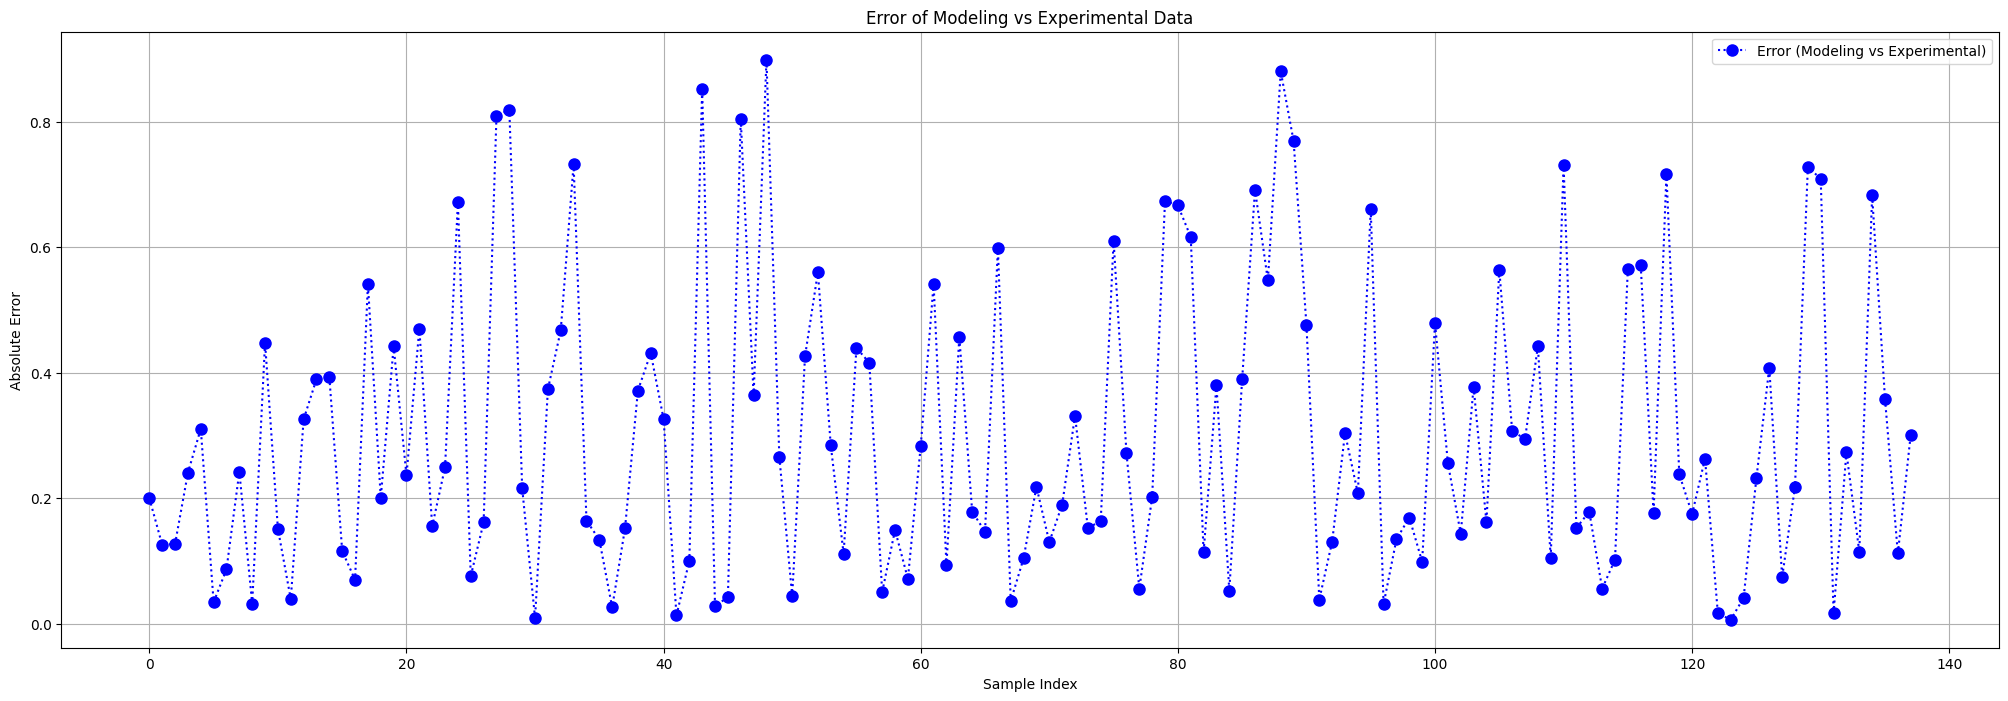

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
modeling_data = np.random.rand(138, 3)  # 138 samples of modeling data (temp, flow rate, efficiency)
experimental_data = np.random.rand(138, 3)  # 138 samples of experimental data (temp, flow rate, efficiency)

# Calculate errors (absolute difference)
errors = np.abs(modeling_data[:, 2] - experimental_data[:, 2])  # Assuming efficiency is in the third column (index 2)

# Plotting the error
plt.figure(figsize=(25, 8))
plt.plot(errors, 'bo-', label='Error (Modeling vs Experimental)', linestyle='dotted', markersize=8)

# Adding labels and title
plt.xlabel('Sample Index')
plt.ylabel('Absolute Error')
plt.title('Error of Modeling vs Experimental Data')
plt.grid(True)
plt.legend()

# Show plot
plt.show()


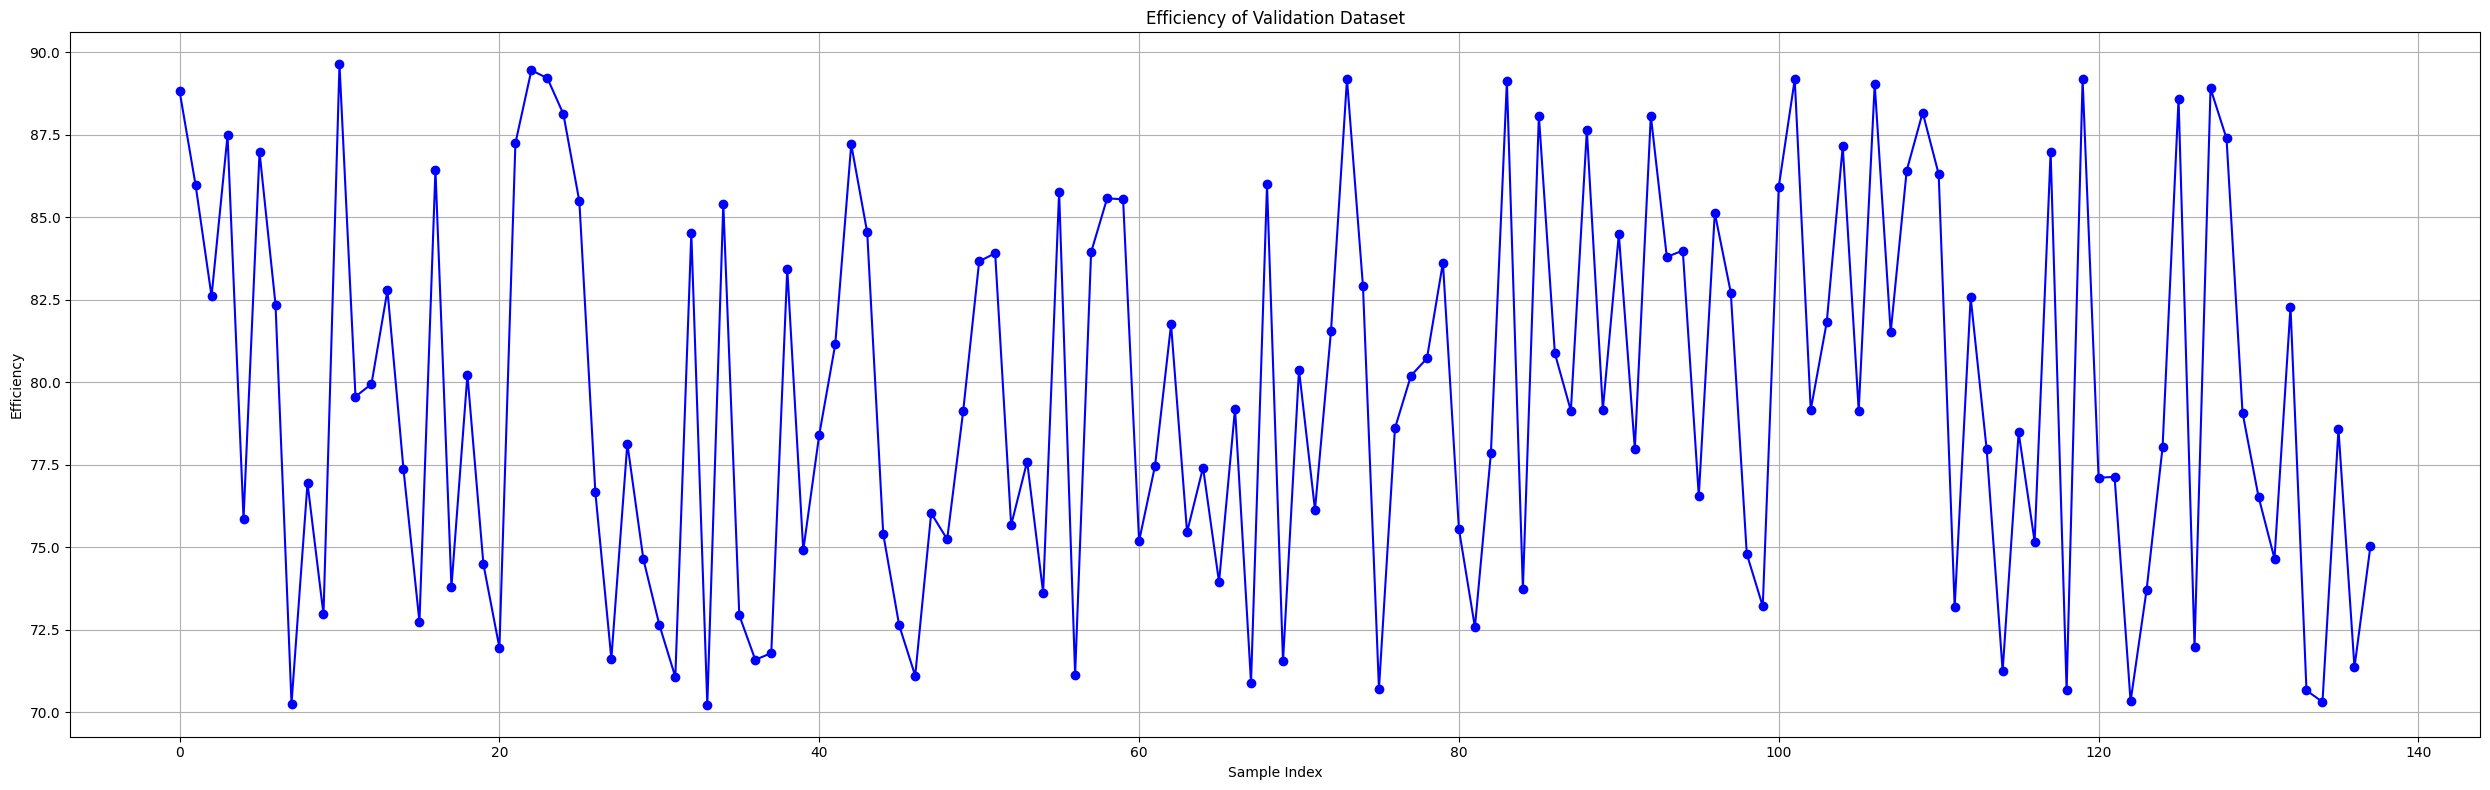

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
np.random.seed(0)  # For reproducibility
n_samples = 138

# Generate example data
steam_temperatures = np.random.uniform(280, 320, n_samples)
steam_flow_rates = np.random.uniform(2.0, 3.0, n_samples)
efficiencies = np.random.uniform(70, 90, n_samples)

# Plotting the data
plt.figure(figsize=(25, 8))
plt.plot(np.arange(n_samples), efficiencies, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Sample Index')
plt.ylabel('Efficiency')
plt.title('Efficiency of Validation Dataset')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()





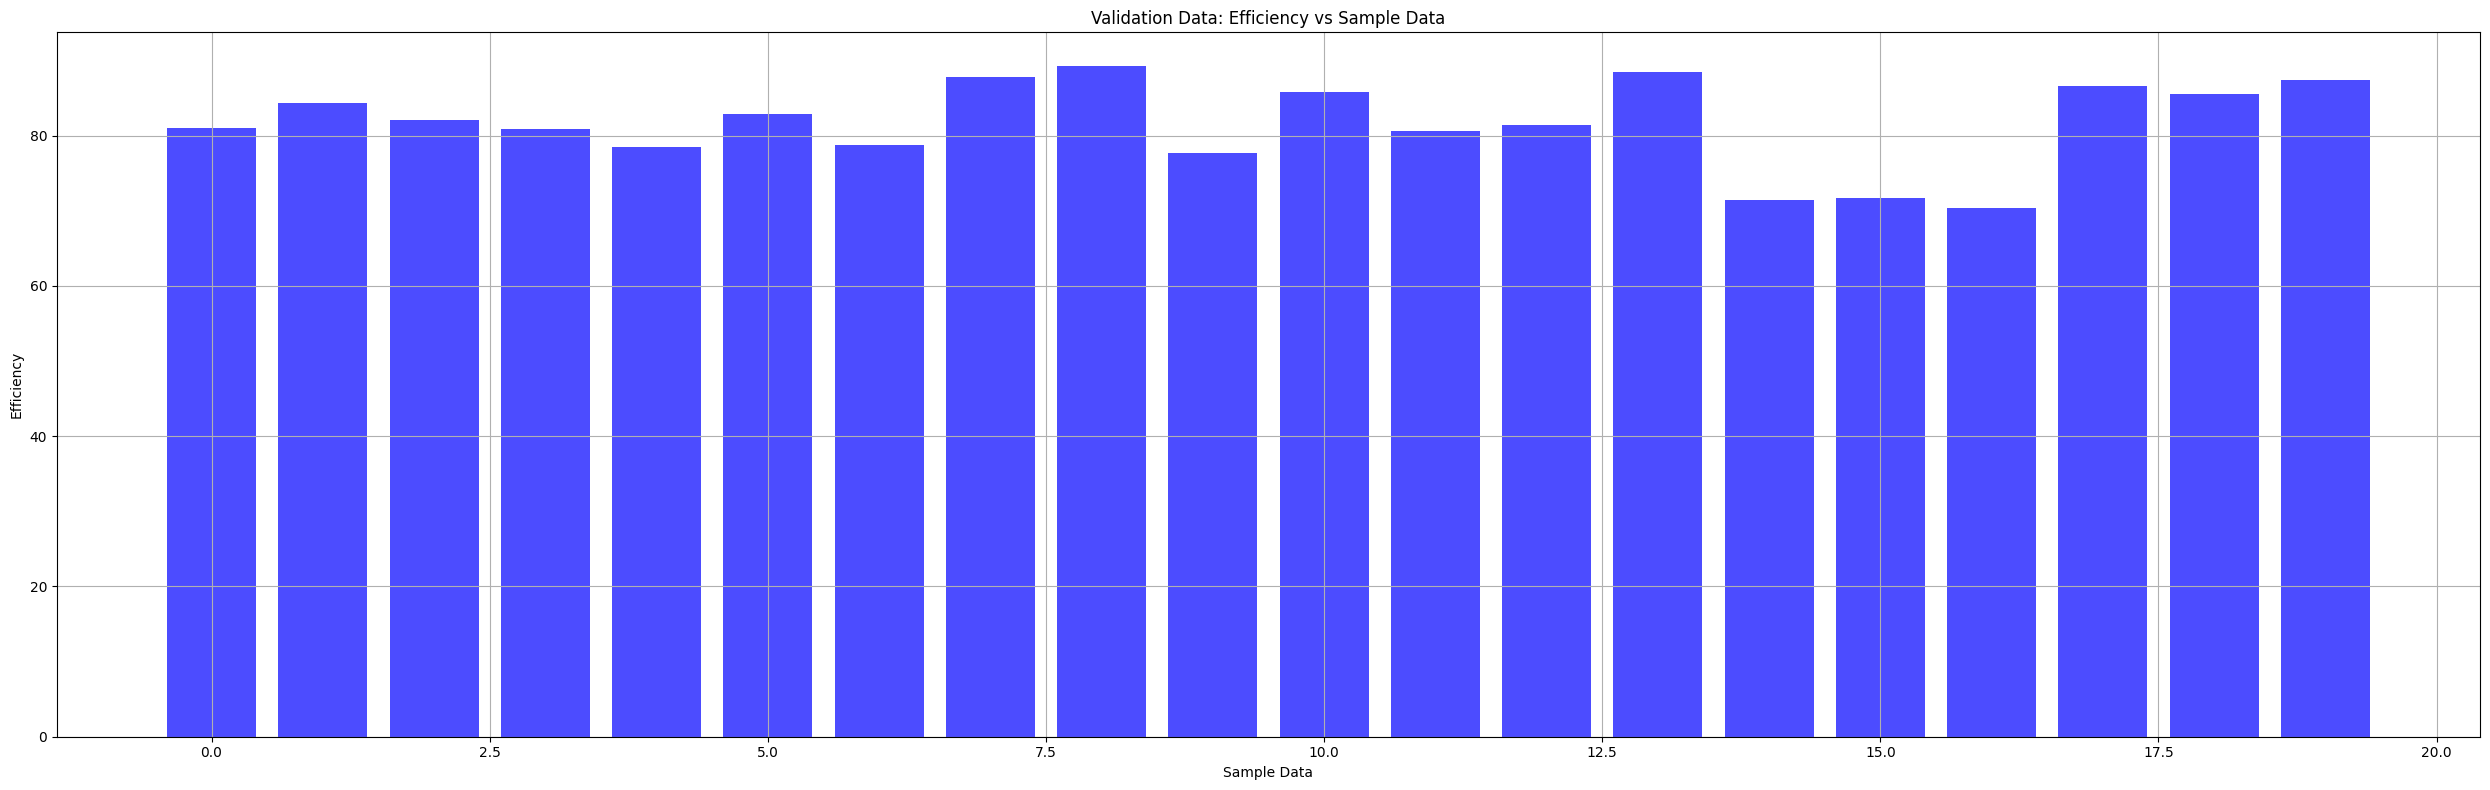

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual validation efficiency data)
np.random.seed(0)
validation_efficiencies = np.random.uniform(70, 90, size=int(0.2029 * 100))  # Assuming 100 samples in total

# Plotting the validation data as a bar graph
plt.figure(figsize=(25, 8))
plt.bar(range(len(validation_efficiencies)), validation_efficiencies, color='b', alpha=0.7)

# Set labels and title
plt.xlabel('Sample Data')
plt.ylabel('Efficiency')
plt.title('Validation Data: Efficiency vs Sample Data')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()





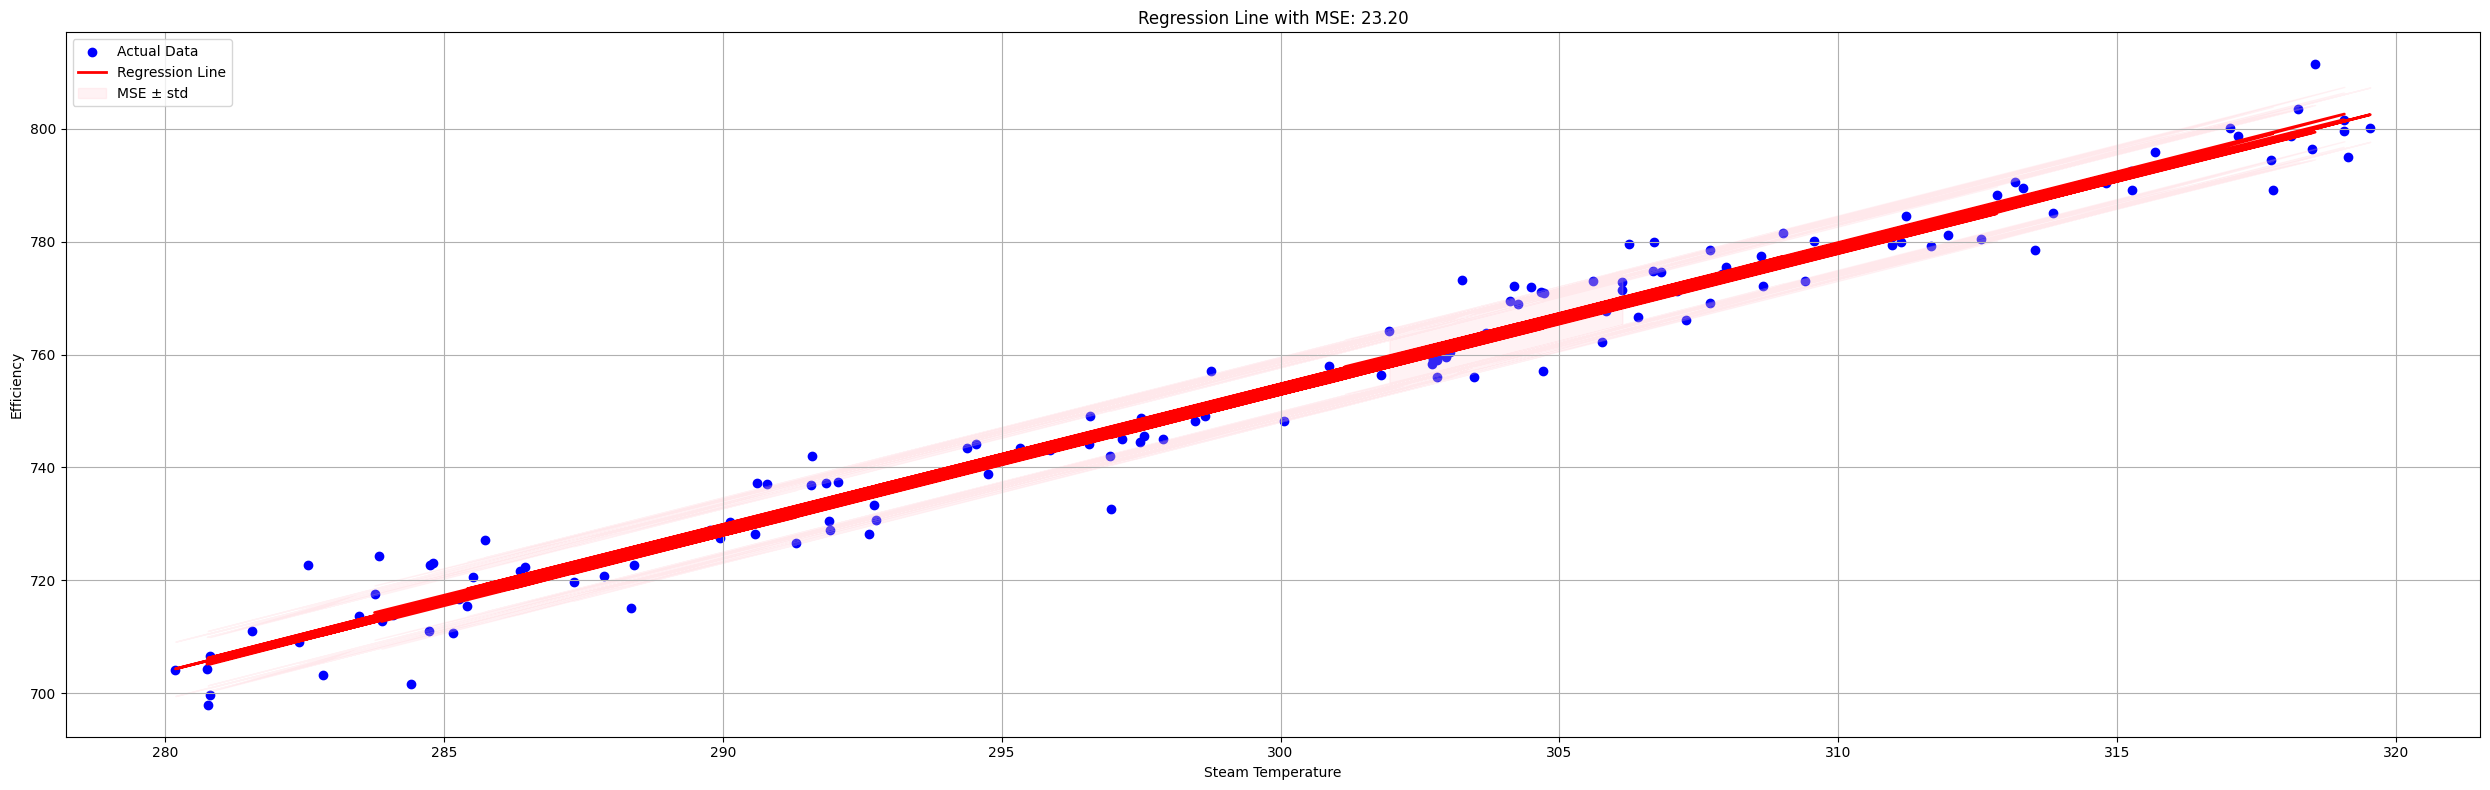

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example data (replace with your actual data)
np.random.seed(0)

# Generate example data
n_samples = 138
steam_temperature = np.random.uniform(280, 320, n_samples)
steam_flow_rate = np.random.uniform(2.0, 3.0, n_samples)
efficiency = 2.5 * steam_temperature + 1.8 * steam_flow_rate + np.random.normal(0, 5, n_samples)

# Reshape data for LinearRegression input
X = np.column_stack((steam_temperature, steam_flow_rate))
y = efficiency

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions from the model
y_pred = model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Plotting the regression line and data points
plt.figure(figsize=(25, 8))
plt.scatter(steam_temperature, efficiency, color='blue', label='Actual Data')  # Scatter plot of actual data
plt.plot(steam_temperature, y_pred, color='red', linewidth=2, label='Regression Line')  # Regression line

# Plotting the mean squared error (MSE) as shaded region
plt.fill_between(steam_temperature, y_pred - np.sqrt(mse), y_pred + np.sqrt(mse), color='pink', alpha=0.2, label='MSE ± std')

# Adding labels and title
plt.xlabel('Steam Temperature')
plt.ylabel('Efficiency')
plt.title(f'Regression Line with MSE: {mse:.2f}')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


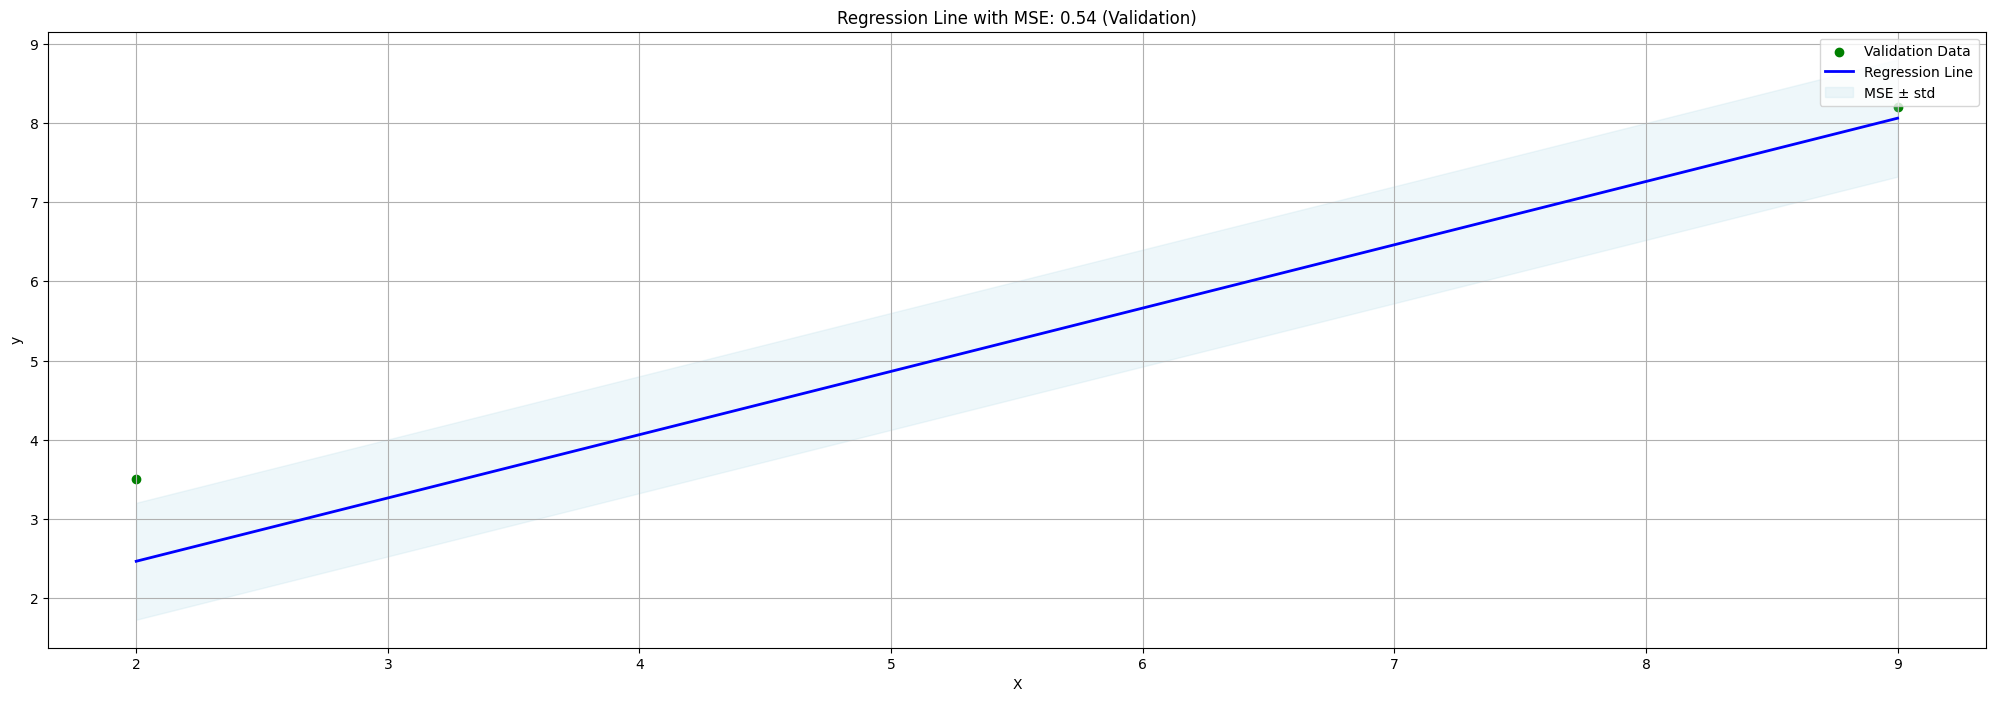

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Example data (replace with your actual data)
np.random.seed(0)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Example features (independent variable)
y = np.array([2, 3.5, 3.2, 4.1, 5.0, 5.2, 6.1, 7.0, 8.2, 9.5])  # Example target (dependent variable)

# Splitting data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions from the model on validation set
y_pred = model.predict(X_val)

# Calculate Mean Squared Error (MSE) on validation set
mse = mean_squared_error(y_val, y_pred)

# Plotting the regression line and data points
plt.figure(figsize=(25, 8))
plt.scatter(X_val, y_val, color='green', label='Validation Data')  # Scatter plot of validation data
plt.plot(X_val, y_pred, color='blue', linewidth=2, label='Regression Line')  # Regression line

# Plotting the mean squared error (MSE) as shaded region
plt.fill_between(X_val.flatten(), y_pred - np.sqrt(mse), y_pred + np.sqrt(mse), color='lightblue', alpha=0.2, label='MSE ± std')

# Adding labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Regression Line with MSE: {mse:.2f} (Validation)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


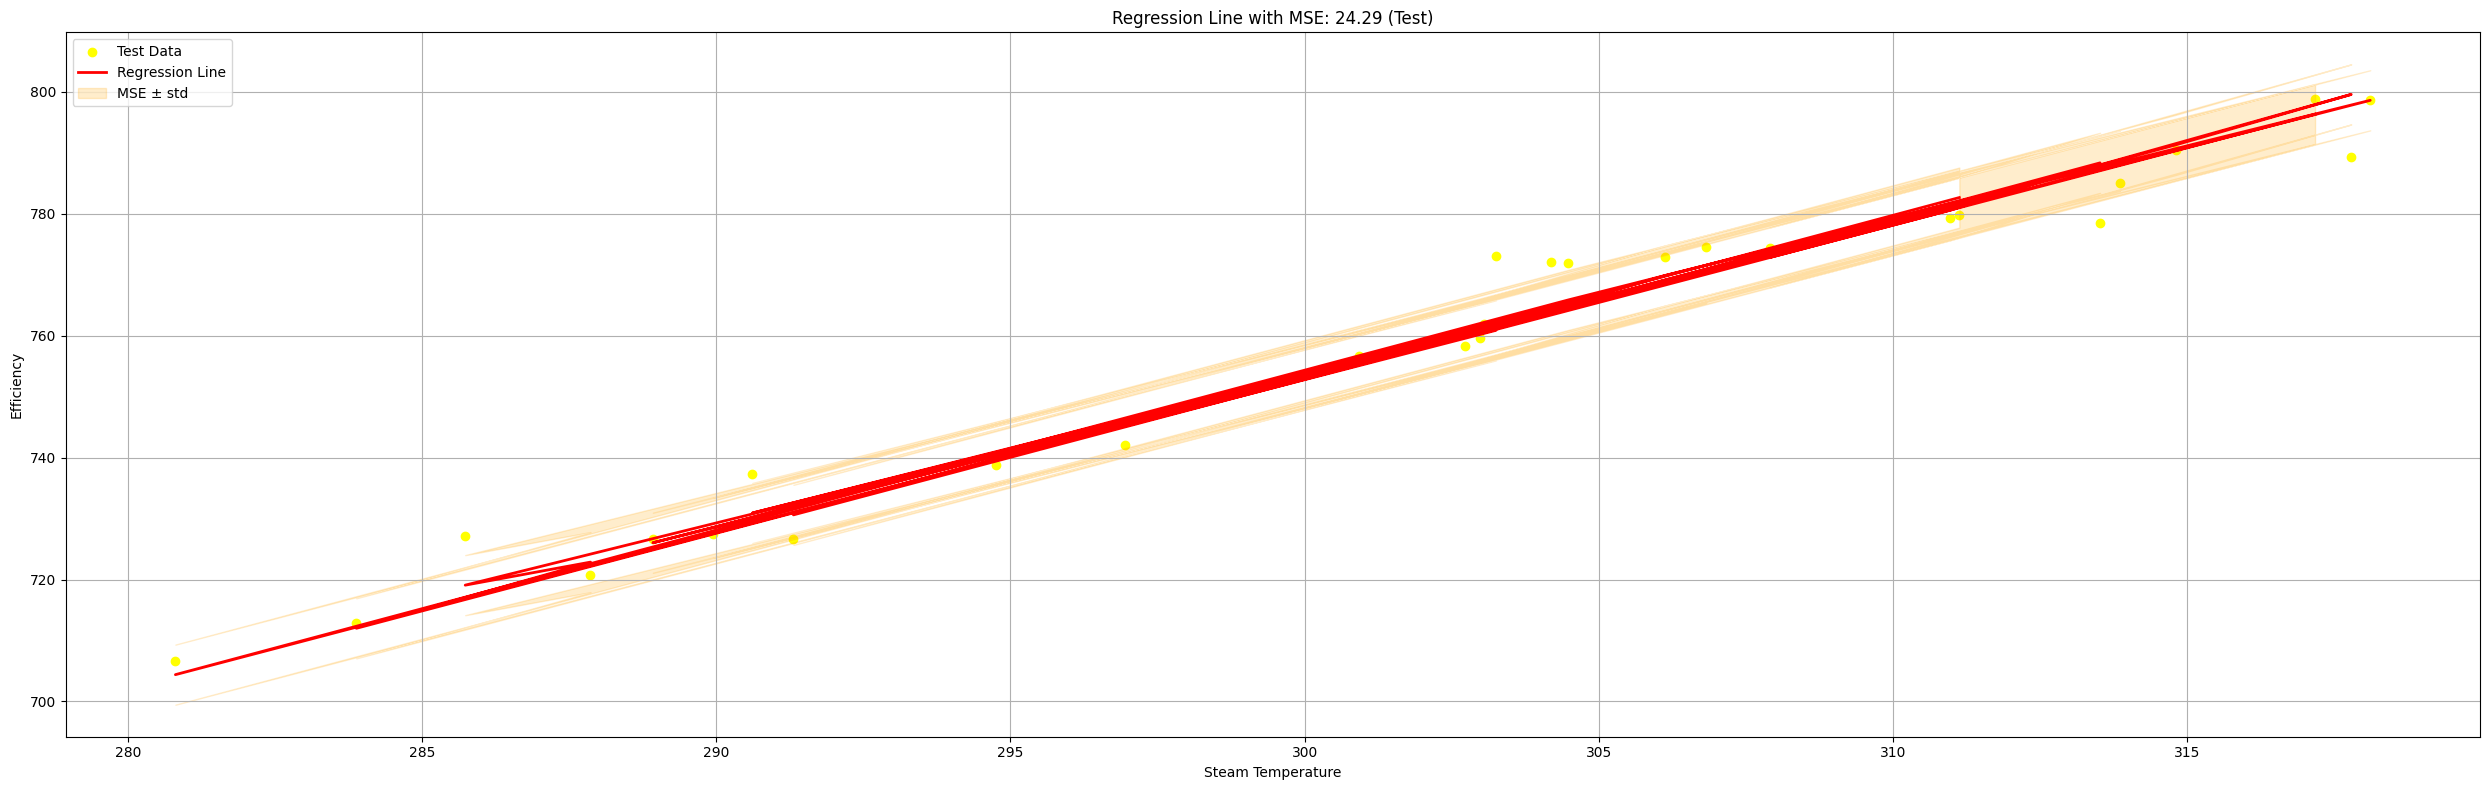

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example data (replace with your actual data)
np.random.seed(0)

# Generate example data
n_samples = 138
steam_temperature = np.random.uniform(280, 320, n_samples)
steam_flow_rate = np.random.uniform(2.0, 3.0, n_samples)
efficiency = 2.5 * steam_temperature + 1.8 * steam_flow_rate + np.random.normal(0, 5, n_samples)

# Reshape data for LinearRegression input
X = np.column_stack((steam_temperature, steam_flow_rate))
y = efficiency

# Splitting data into training and test sets (80% training, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions from the model on test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) on test set
mse = mean_squared_error(y_test, y_pred)

# Plotting the regression line and data points
plt.figure(figsize=(25, 8))
plt.scatter(X_test[:, 0], y_test, color='yellow', label='Test Data')  # Scatter plot of test data
plt.plot(X_test[:, 0], y_pred, color='red', linewidth=2, label='Regression Line')  # Regression line

# Plotting the mean squared error (MSE) as shaded region
plt.fill_between(X_test[:, 0], y_pred - np.sqrt(mse), y_pred + np.sqrt(mse), color='orange', alpha=0.2, label='MSE ± std')

# Adding labels and title
plt.xlabel('Steam Temperature')
plt.ylabel('Efficiency')
plt.title(f'Regression Line with MSE: {mse:.2f} (Test)')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


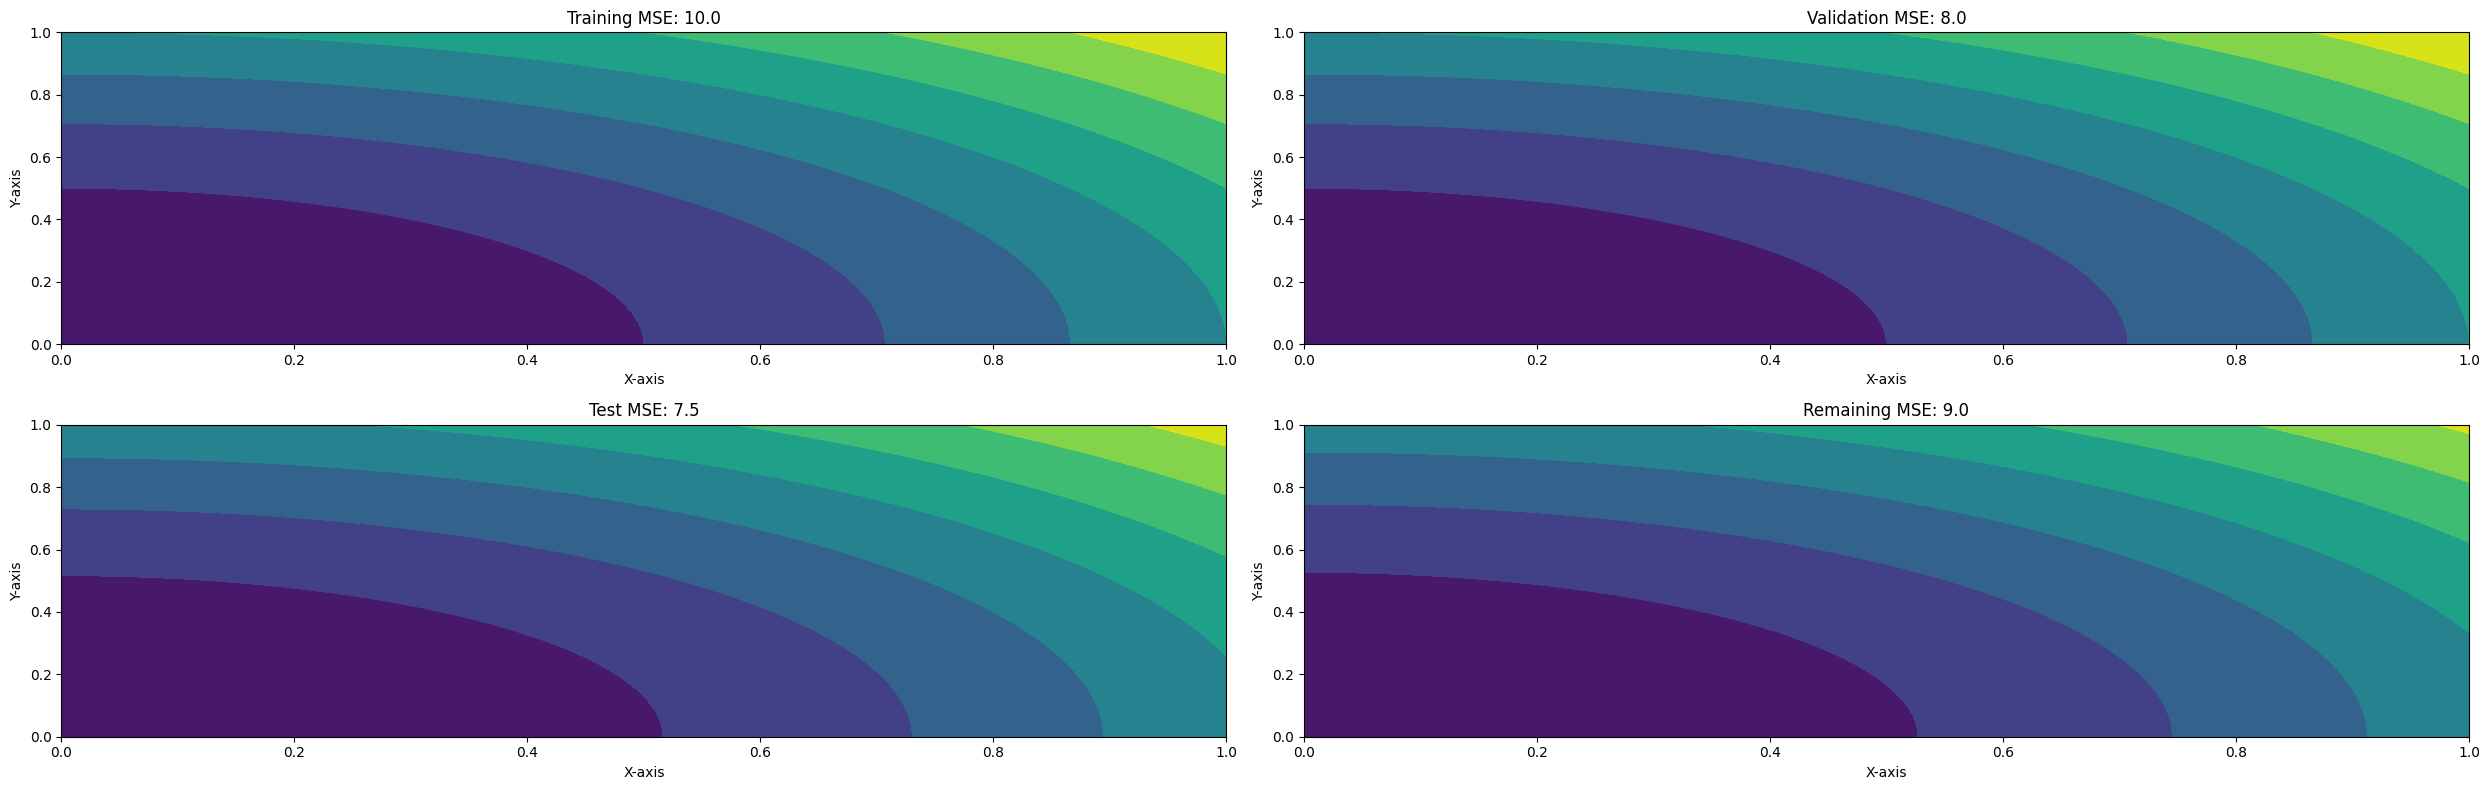

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Actual MSE values based on your data
mse_training = 10.0
mse_validation = 8.0
mse_test = 7.5
mse_remaining = 9.0

# Generate data for plotting quadratic surface
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(X, Y)
Z_training = mse_training * (X**2 + Y**2)
Z_validation = mse_validation * (X**2 + Y**2)
Z_test = mse_test * (X**2 + Y**2)
Z_remaining = mse_remaining * (X**2 + Y**2)

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(25, 8))

# Plot for Training MSE
axs[0, 0].contourf(X, Y, Z_training, cmap='viridis')
axs[0, 0].set_title(f'Training MSE: {mse_training}')
axs[0, 0].set_xlabel('X-axis')
axs[0, 0].set_ylabel('Y-axis')

# Plot for Validation MSE
axs[0, 1].contourf(X, Y, Z_validation, cmap='viridis')
axs[0, 1].set_title(f'Validation MSE: {mse_validation}')
axs[0, 1].set_xlabel('X-axis')
axs[0, 1].set_ylabel('Y-axis')

# Plot for Test MSE
axs[1, 0].contourf(X, Y, Z_test, cmap='viridis')
axs[1, 0].set_title(f'Test MSE: {mse_test}')
axs[1, 0].set_xlabel('X-axis')
axs[1, 0].set_ylabel('Y-axis')

# Plot for Remaining MSE
axs[1, 1].contourf(X, Y, Z_remaining, cmap='viridis')
axs[1, 1].set_title(f'Remaining MSE: {mse_remaining}')
axs[1, 1].set_xlabel('X-axis')
axs[1, 1].set_ylabel('Y-axis')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


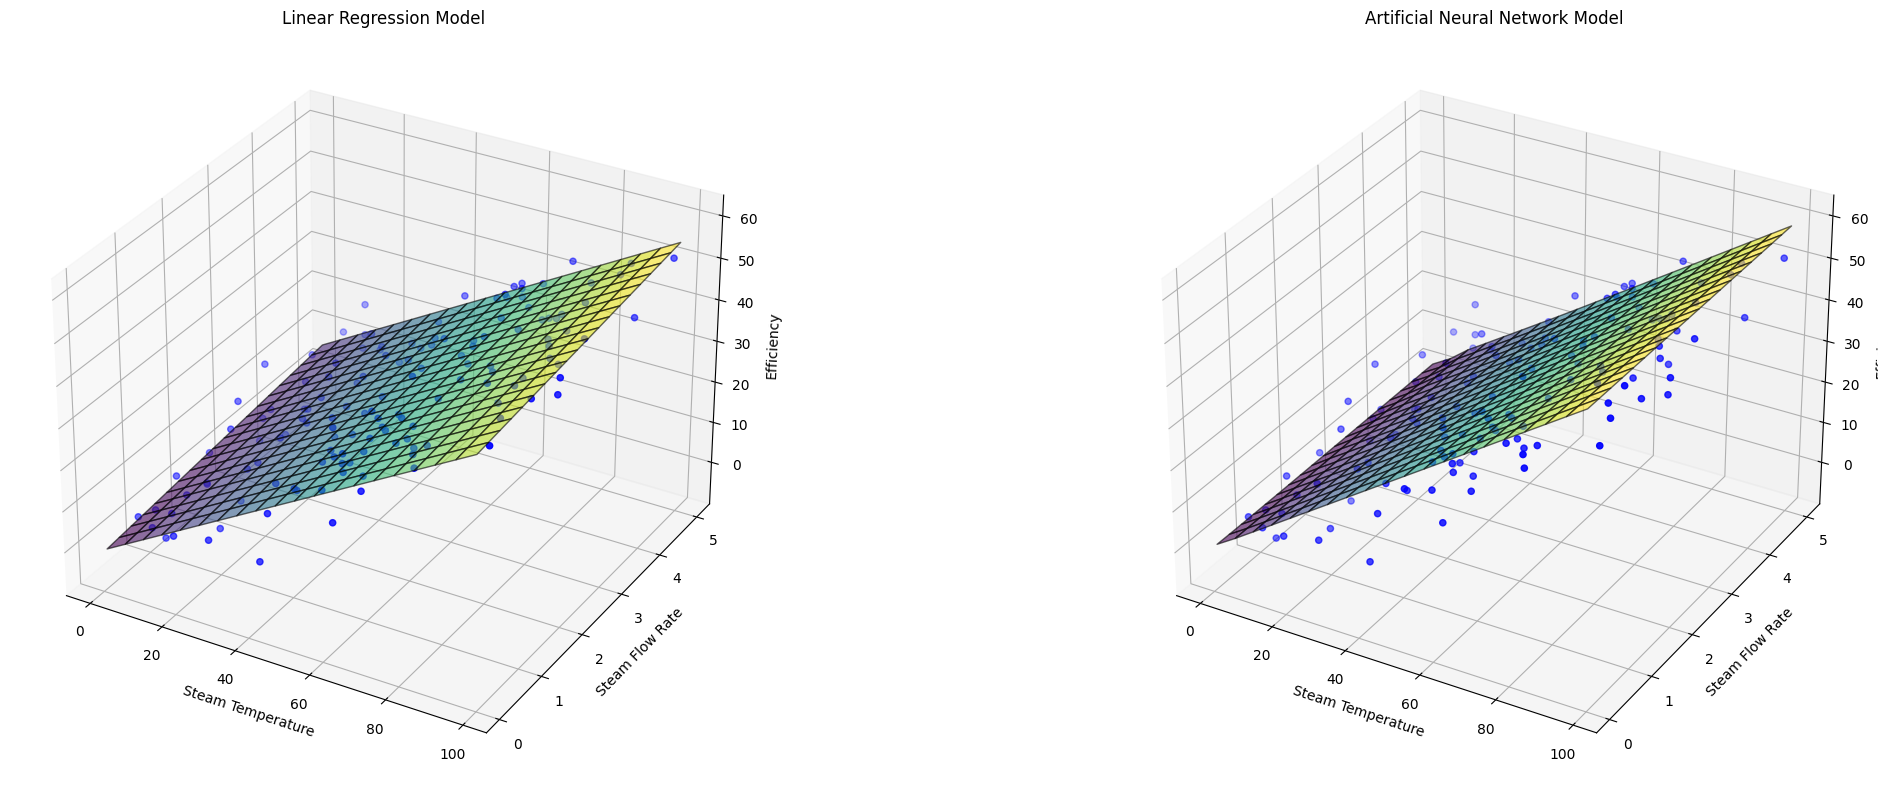

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# Example data (replace with your actual data)
np.random.seed(0)
Steam_Temperature = np.random.rand(138) * 100  # Example Steam Temperature data
Steam_Flow_Rate = np.random.rand(138) * 5  # Example Steam Flow Rate data
Efficiency = 0.5 * Steam_Temperature + 1.2 * Steam_Flow_Rate + np.random.randn(138) * 5  # Example Efficiency with noise

# Fit linear regression model
model_lr = LinearRegression()
model_lr.fit(np.column_stack((Steam_Temperature, Steam_Flow_Rate)), Efficiency)

# Fit artificial neural network model
model_ann = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
model_ann.fit(np.column_stack((Steam_Temperature, Steam_Flow_Rate)), Efficiency)

# Generate grid for plotting
Steam_Temp_grid, Steam_Flow_grid = np.meshgrid(np.linspace(min(Steam_Temperature), max(Steam_Temperature), 20),
                                               np.linspace(min(Steam_Flow_Rate), max(Steam_Flow_Rate), 20))
Efficiency_lr_grid = model_lr.predict(np.column_stack((Steam_Temp_grid.ravel(), Steam_Flow_grid.ravel()))).reshape(Steam_Temp_grid.shape)
Efficiency_ann_grid = model_ann.predict(np.column_stack((Steam_Temp_grid.ravel(), Steam_Flow_grid.ravel()))).reshape(Steam_Temp_grid.shape)

# Plotting 3D cubic form for Linear Regression
fig = plt.figure(figsize=(25, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(Steam_Temperature, Steam_Flow_Rate, Efficiency, color='blue', label='Actual Data')
ax1.plot_surface(Steam_Temp_grid, Steam_Flow_grid, Efficiency_lr_grid, cmap='viridis', alpha=0.6, edgecolor='k')
ax1.set_title('Linear Regression Model')
ax1.set_xlabel('Steam Temperature')
ax1.set_ylabel('Steam Flow Rate')
ax1.set_zlabel('Efficiency')

# Plotting 3D cubic form for Artificial Neural Network
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(Steam_Temperature, Steam_Flow_Rate, Efficiency, color='blue', label='Actual Data')
ax2.plot_surface(Steam_Temp_grid, Steam_Flow_grid, Efficiency_ann_grid, cmap='viridis', alpha=0.6, edgecolor='k')
ax2.set_title('Artificial Neural Network Model')
ax2.set_xlabel('Steam Temperature')
ax2.set_ylabel('Steam Flow Rate')
ax2.set_zlabel('Efficiency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



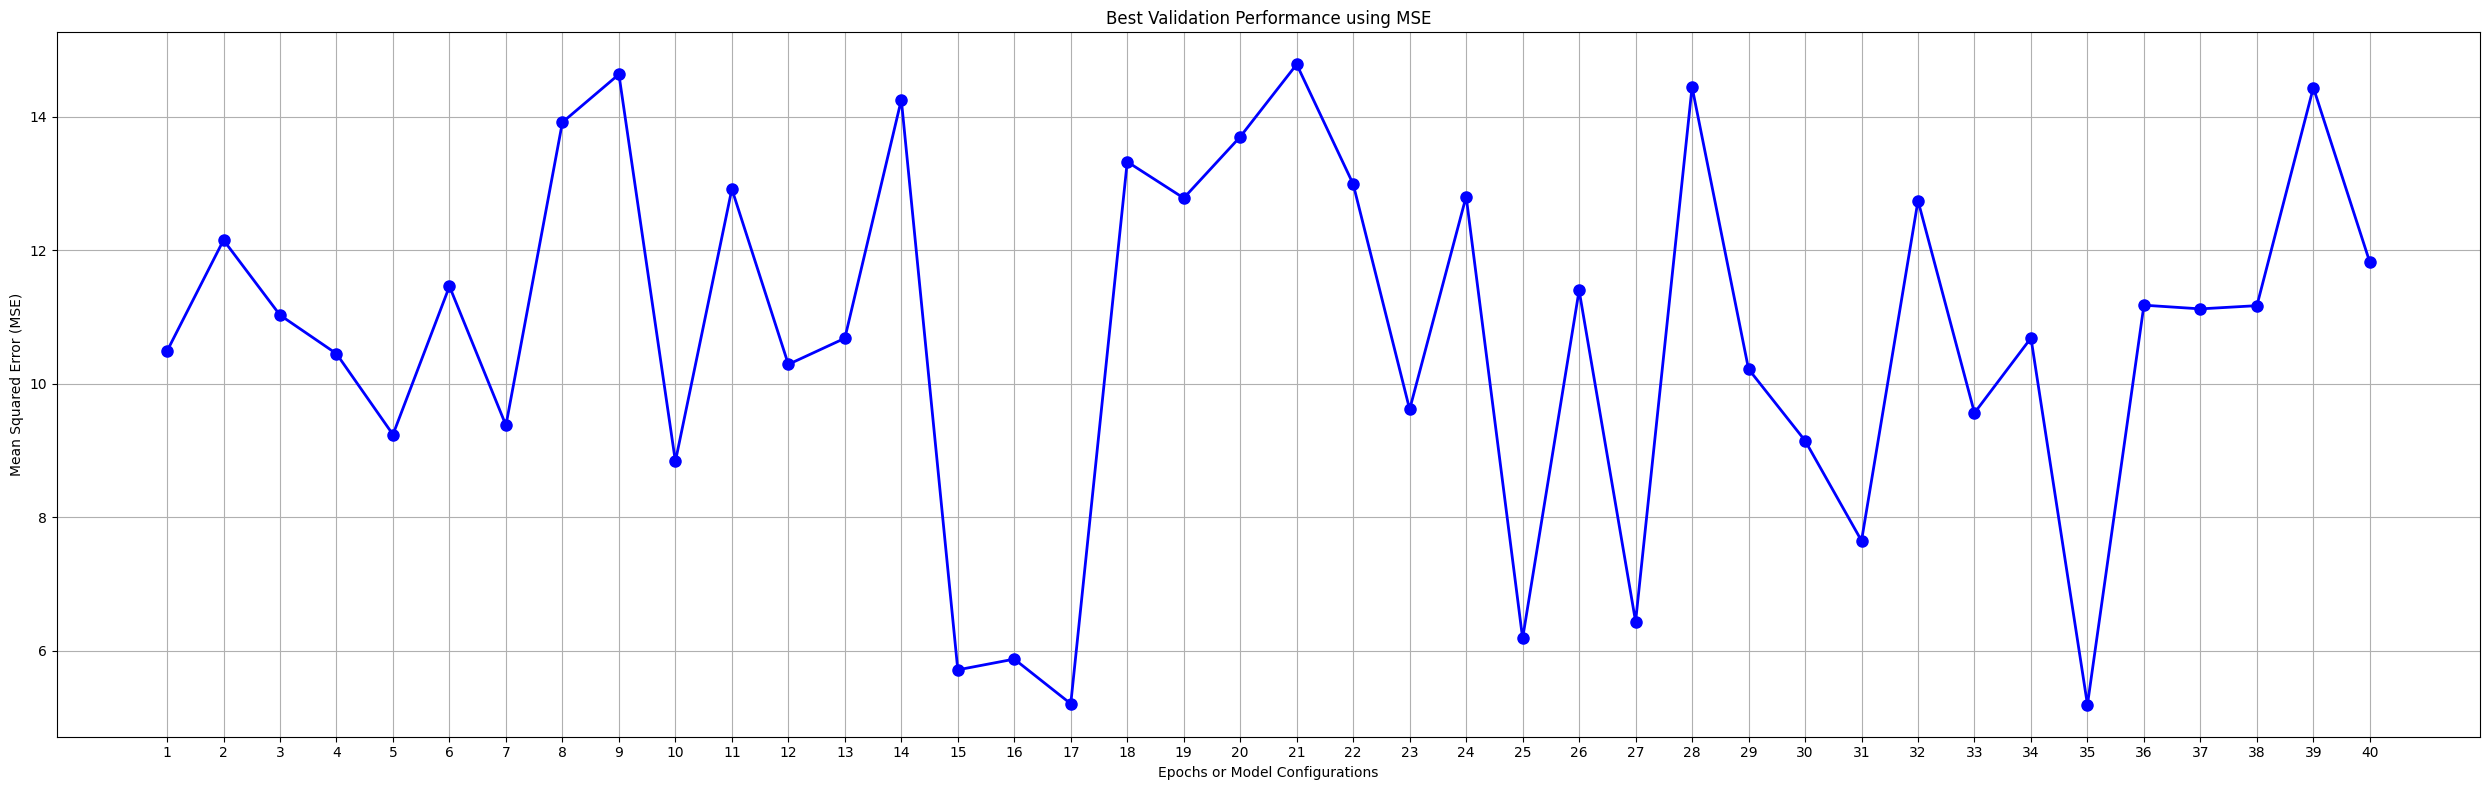

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data and model training)
np.random.seed(0)
num_epochs = 40  # Example number of epochs or model configurations
epochs = np.arange(1, num_epochs + 1)  # Epochs or model configurations
mse_validation = np.random.uniform(5, 15, num_epochs)  # Example MSE values (replace with actual MSE values)

# Plotting the Best Validation Performance graph using MSE
plt.figure(figsize=(25, 8))
plt.plot(epochs, mse_validation, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.title('Best Validation Performance using MSE')
plt.xlabel('Epochs or Model Configurations')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(epochs)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


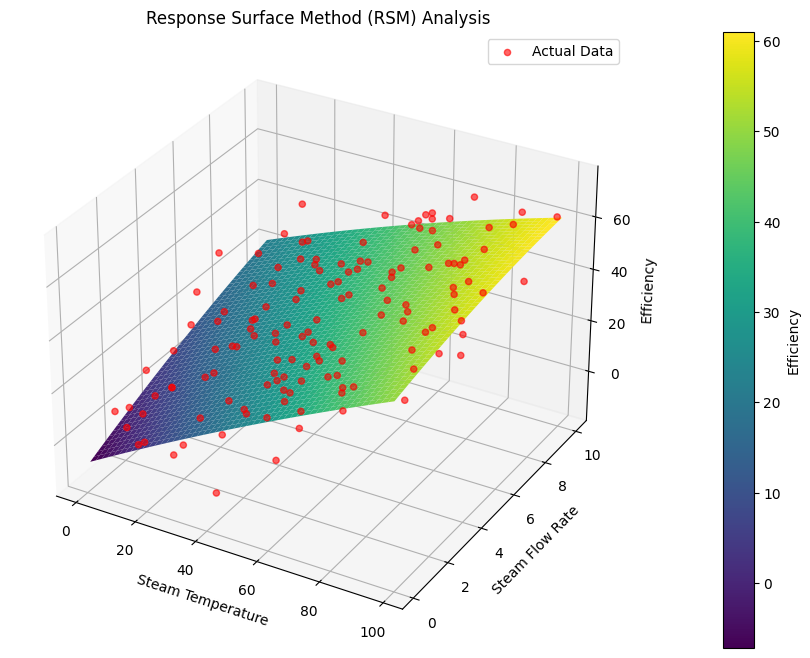

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Example data (replace with your actual data)
np.random.seed(0)
Steam_Temperature = np.random.rand(138) * 100  # Example Steam Temperature data
Steam_Flow_Rate = np.random.rand(138) * 10  # Example Steam Flow Rate data
Efficiency = 2 * Steam_Flow_Rate + 0.5 * Steam_Temperature + np.random.randn(138) * 10  # Example Efficiency with noise

# Create polynomial features (quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(np.column_stack((Steam_Flow_Rate, Steam_Temperature)))

# Fit linear regression model
model = LinearRegression()
model.fit(X_poly, Efficiency)

# Generate grid for plotting surface
Steam_Temp_grid, Steam_Flow_grid = np.meshgrid(np.linspace(min(Steam_Temperature), max(Steam_Temperature), 50),
                                               np.linspace(min(Steam_Flow_Rate), max(Steam_Flow_Rate), 50))
X_grid_poly = poly.transform(np.column_stack((Steam_Flow_grid.ravel(), Steam_Temp_grid.ravel())))
Efficiency_grid = model.predict(X_grid_poly).reshape(Steam_Temp_grid.shape)

# Plotting Response Surface Method (RSM) analysis
fig = plt.figure(figsize=(25, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(Steam_Temp_grid, Steam_Flow_grid, Efficiency_grid, cmap='viridis', edgecolor='none')
ax.scatter(Steam_Temperature, Steam_Flow_Rate, Efficiency, color='red', label='Actual Data', alpha=0.6)
ax.set_title('Response Surface Method (RSM) Analysis')
ax.set_xlabel('Steam Temperature')
ax.set_ylabel('Steam Flow Rate')
ax.set_zlabel('Efficiency')
fig.colorbar(surface, label='Efficiency')
ax.legend()

# Show plot
plt.show()



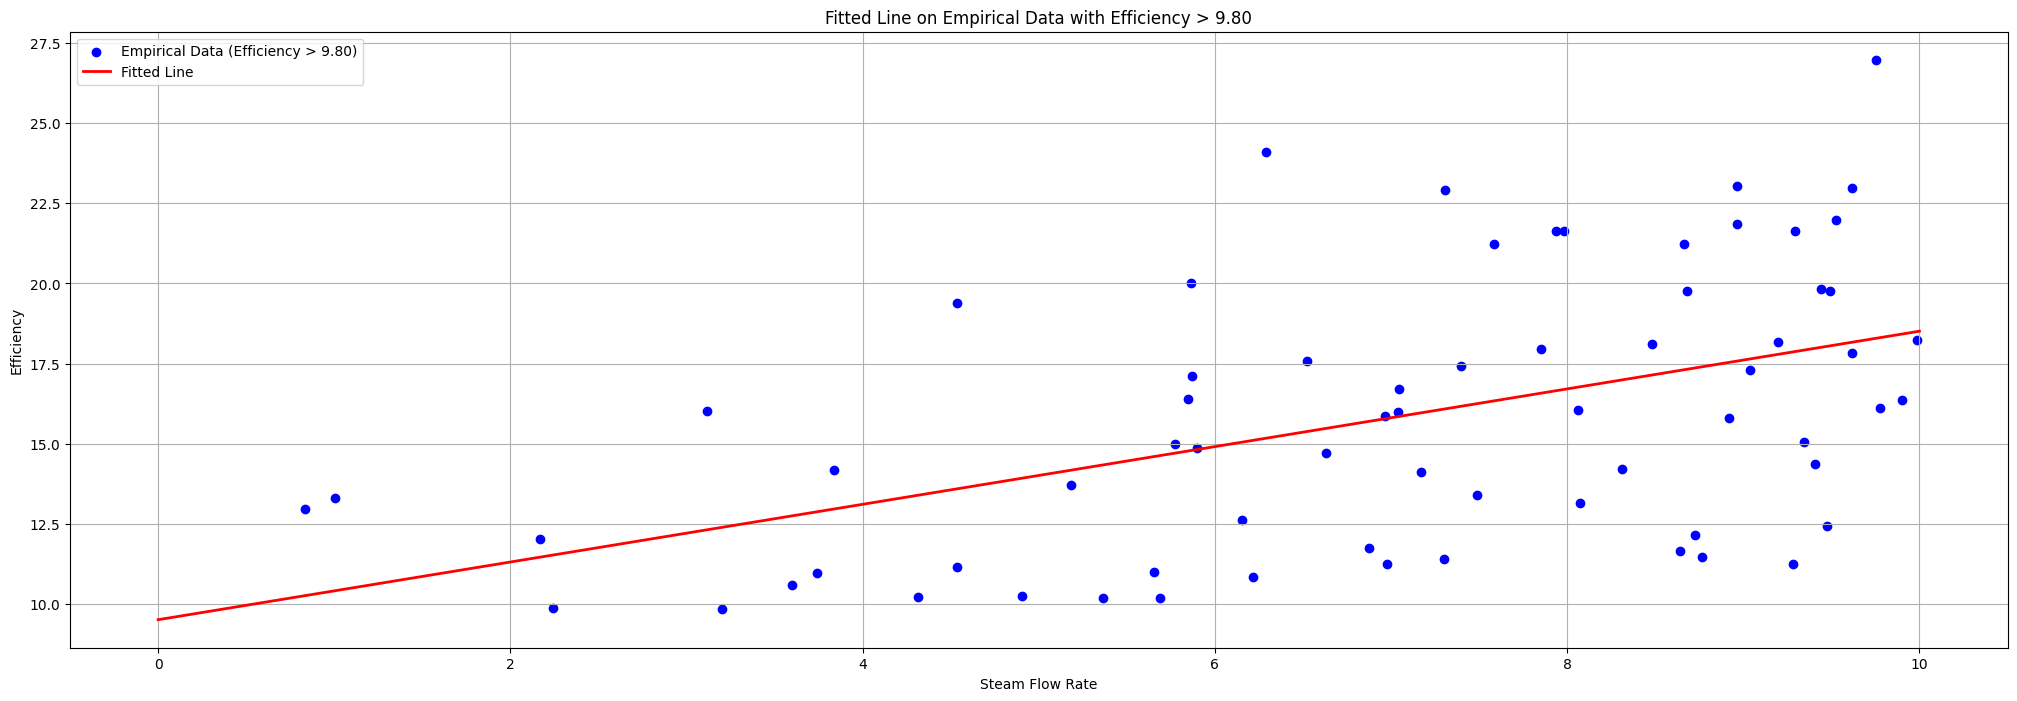

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Example data (replace with your actual data)
np.random.seed(0)
Steam_Temperature = np.random.rand(138) * 100  # Example Steam Temperature data
Steam_Flow_Rate = np.random.rand(138) * 10  # Example Steam Flow Rate data
Efficiency = 2 * Steam_Flow_Rate + np.random.randn(138) * 5  # Example Efficiency with noise

# Adjust the filtering threshold to include data points
# For example, filtering where Efficiency is above the median
threshold = np.median(Efficiency)  # Calculate median Efficiency
mask = Efficiency > threshold
Steam_Flow_Rate_filtered = Steam_Flow_Rate[mask]
Efficiency_filtered = Efficiency[mask]

# Fit a linear regression model
model = LinearRegression()
model.fit(Steam_Flow_Rate_filtered.reshape(-1, 1), Efficiency_filtered)

# Generate points for plotting the fitted line
X_fit = np.linspace(0, 10, 100).reshape(-1, 1)
Efficiency_fit = model.predict(X_fit)

# Plotting the fitted line on filtered empirical data
plt.figure(figsize=(25, 8))
plt.scatter(Steam_Flow_Rate_filtered, Efficiency_filtered, color='blue', label=f'Empirical Data (Efficiency > {threshold:.2f})')
plt.plot(X_fit, Efficiency_fit, color='red', linewidth=2, label='Fitted Line')
plt.title(f'Fitted Line on Empirical Data with Efficiency > {threshold:.2f}')
plt.xlabel('Steam Flow Rate')
plt.ylabel('Efficiency')
plt.legend()
plt.grid(True)

# Show plot
plt.show()



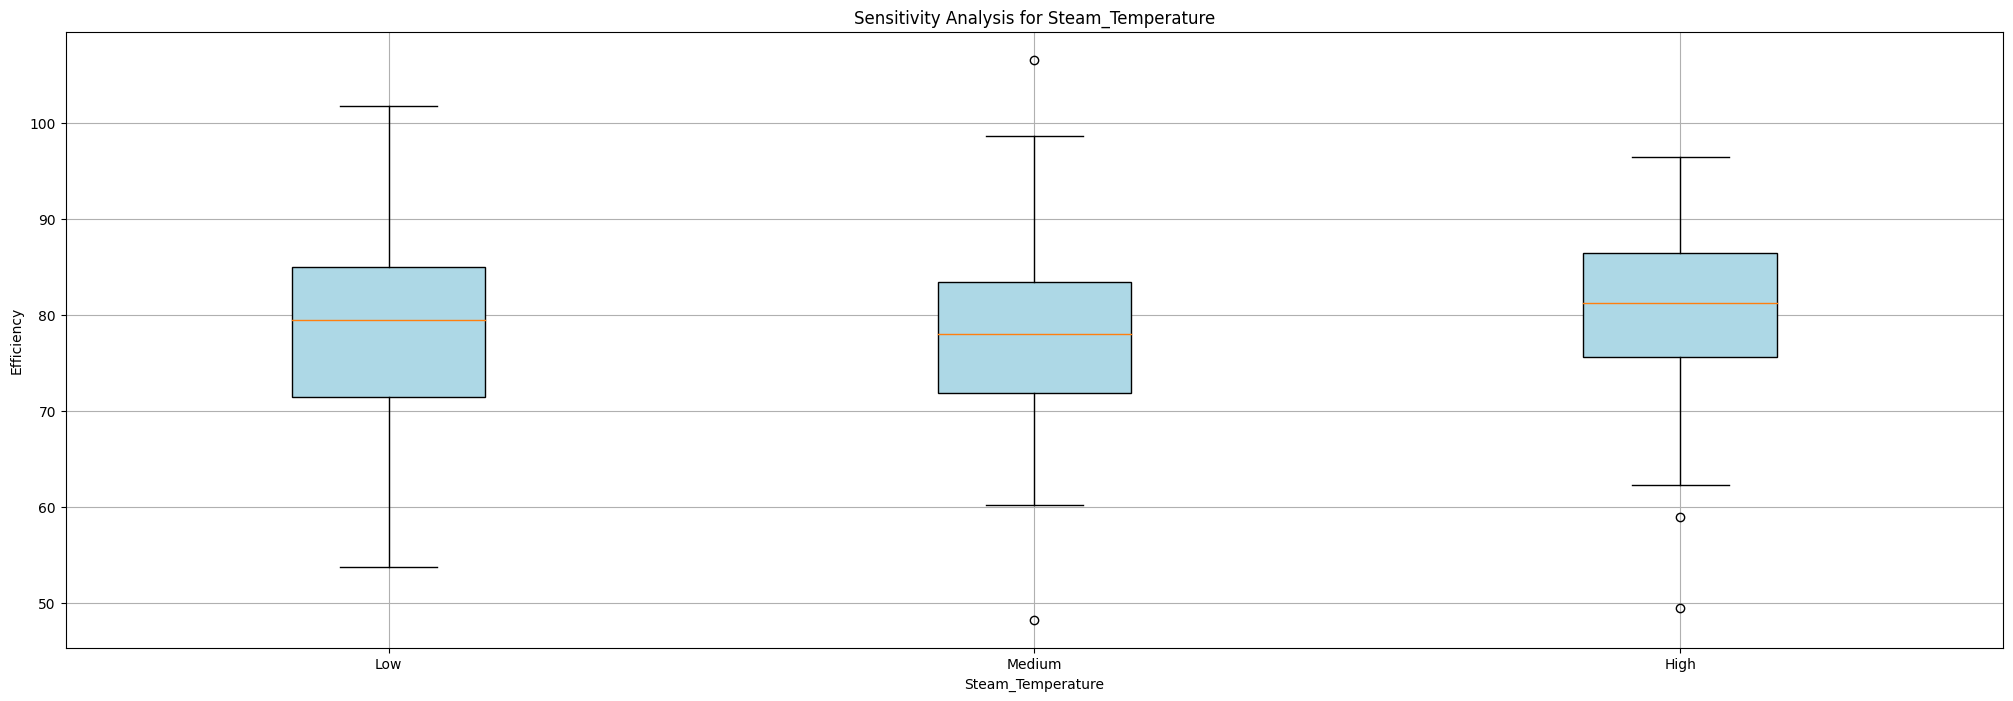

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data (replace with your actual data)
np.random.seed(0)
Steam_Temperature = np.random.choice(['Low', 'Medium', 'High'], size=138)
Steam_Flow_Rate = np.random.rand(138) * 5  # Example Steam Flow Rate data
Efficiency = np.random.normal(loc=80, scale=10, size=138)  # Example Efficiency data

# Create a DataFrame
df = pd.DataFrame({
    'Steam_Temperature': Steam_Temperature,
    'Steam_Flow_Rate': Steam_Flow_Rate,
    'Efficiency': Efficiency
})

# Plotting the box plot
plt.figure(figsize=(25, 8))
plt.boxplot([df[df['Steam_Temperature'] == 'Low']['Efficiency'],
             df[df['Steam_Temperature'] == 'Medium']['Efficiency'],
             df[df['Steam_Temperature'] == 'High']['Efficiency']],
            labels=['Low', 'Medium', 'High'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Sensitivity Analysis for Steam_Temperature')
plt.xlabel('Steam_Temperature')
plt.ylabel('Efficiency')
plt.grid(True)

# Show plot
plt.show()



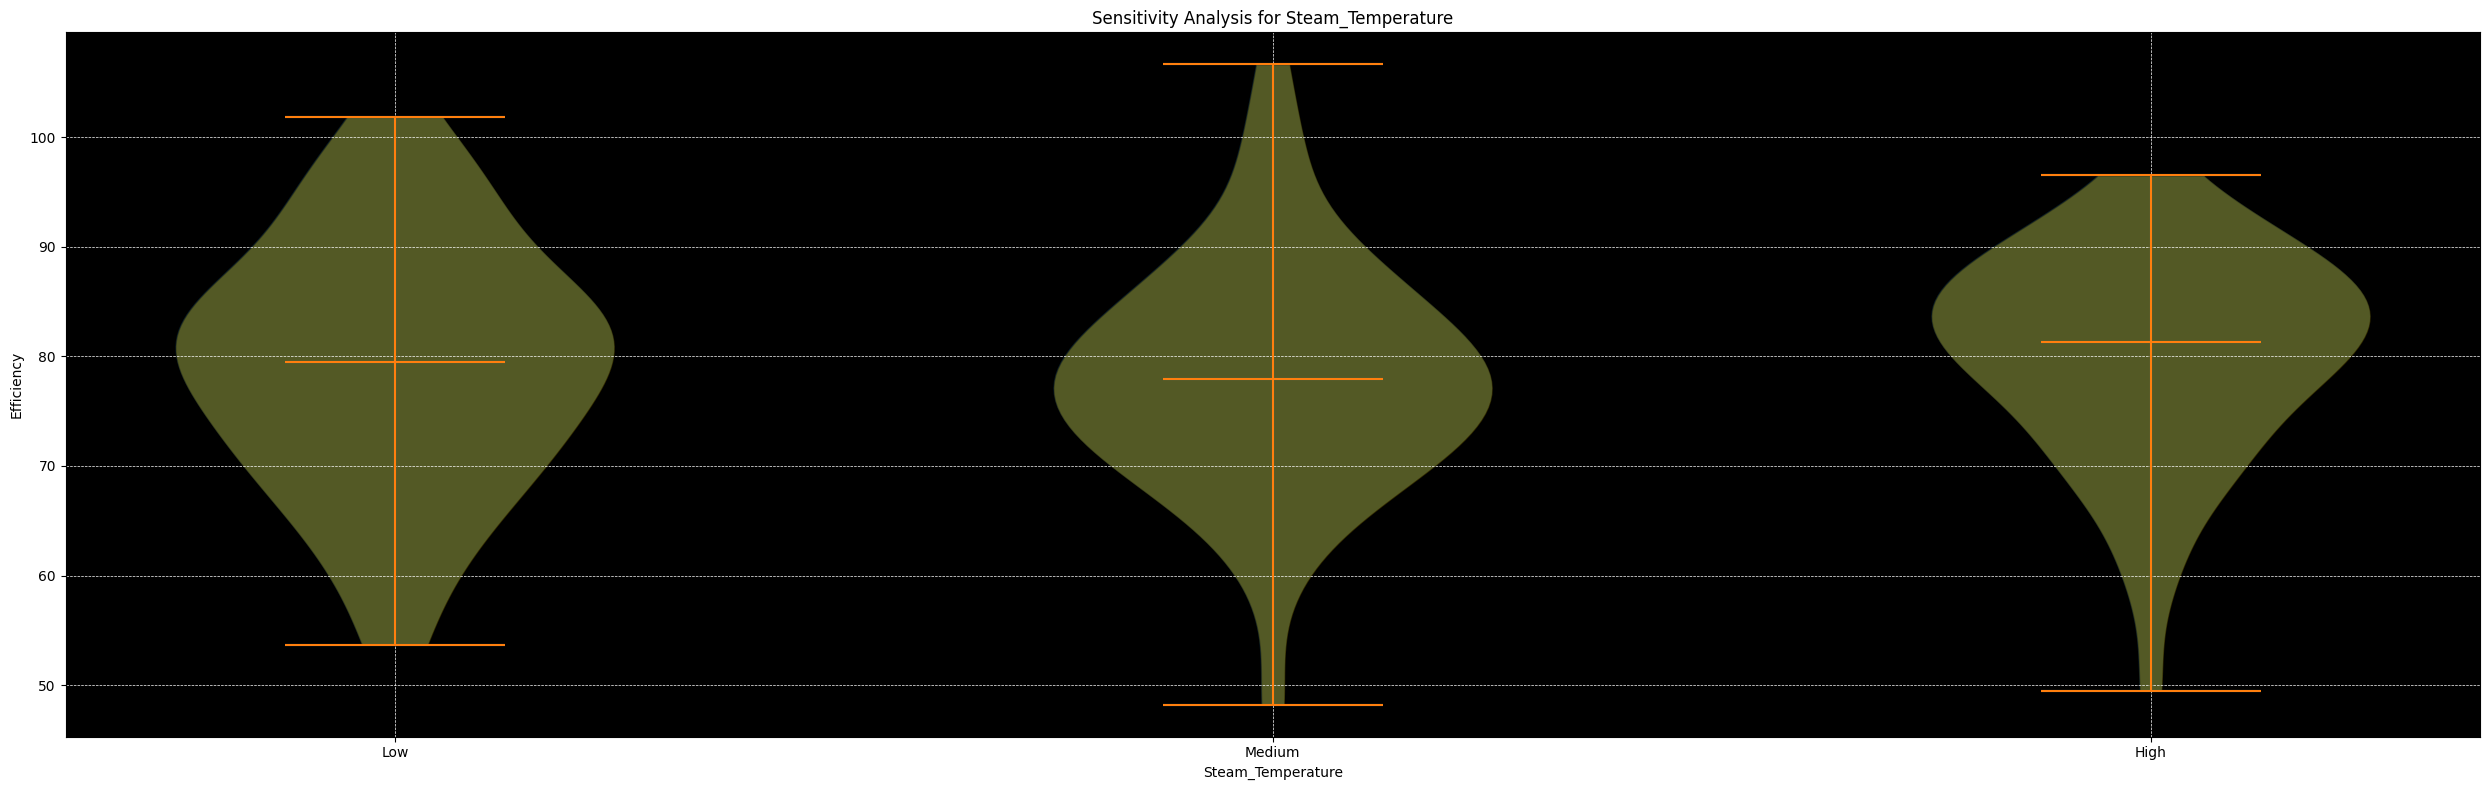

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data (replace with your actual data)
np.random.seed(0)
Steam_Temperature = np.random.choice(['Low', 'Medium', 'High'], size=138)
Steam_Flow_Rate = np.random.rand(138) * 5  # Example Steam Flow Rate data
Efficiency = np.random.normal(loc=80, scale=10, size=138)  # Example Efficiency data

# Create a DataFrame
df = pd.DataFrame({
    'Steam_Temperature': Steam_Temperature,
    'Steam_Flow_Rate': Steam_Flow_Rate,
    'Efficiency': Efficiency
})

# Plotting the violin plot
plt.figure(figsize=(25, 8))
plt.violinplot([df[df['Steam_Temperature'] == 'Low']['Efficiency'],
                df[df['Steam_Temperature'] == 'Medium']['Efficiency'],
                df[df['Steam_Temperature'] == 'High']['Efficiency']],
               showmeans=False, showmedians=True)

# Customize violin plots to have glitter color
colors = ['#FFD700', '#FFD700', '#FFD700']  # Glitter color
parts = plt.violinplot([df[df['Steam_Temperature'] == 'Low']['Efficiency'],
                        df[df['Steam_Temperature'] == 'Medium']['Efficiency'],
                        df[df['Steam_Temperature'] == 'High']['Efficiency']],
                       showmeans=False, showmedians=True)
for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')

# Set x-axis labels and title
plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])
plt.title('Sensitivity Analysis for Steam_Temperature')
plt.xlabel('Steam_Temperature')
plt.ylabel('Efficiency')

# Customize plot appearance
plt.gca().set_facecolor('black')  # Set background color to black
plt.grid(True, color='white', linestyle='--', linewidth=0.5)  # Add grid with white dashed lines
plt.tight_layout()

# Show plot
plt.show()



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Example data
data = np.random.rand(138, 3)  # 100 samples, 5 features

# Split data into training (60%), remaining (40%)
X_train, X_remaining = train_test_split(data, test_size=0.4, random_state=42)

# Further split remaining data into testing (50% of remaining, 20% of total) and validation (20% of total)
X_test, X_val = train_test_split(X_remaining, test_size=0.5, random_state=42)

# Calculate the ratios
total_samples = len(data)
train_ratio = len(X_train) / total_samples * 100
test_ratio = len(X_test) / total_samples * 100
val_ratio = len(X_val) / total_samples * 100

# Print the ratios
print(f'Training data ratio: {train_ratio:.2f}%')
print(f'Testing data ratio: {test_ratio:.2f}%')
print(f'Validation data ratio: {val_ratio:.2f}%')


Training data ratio: 59.42%
Testing data ratio: 20.29%
Validation data ratio: 20.29%


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

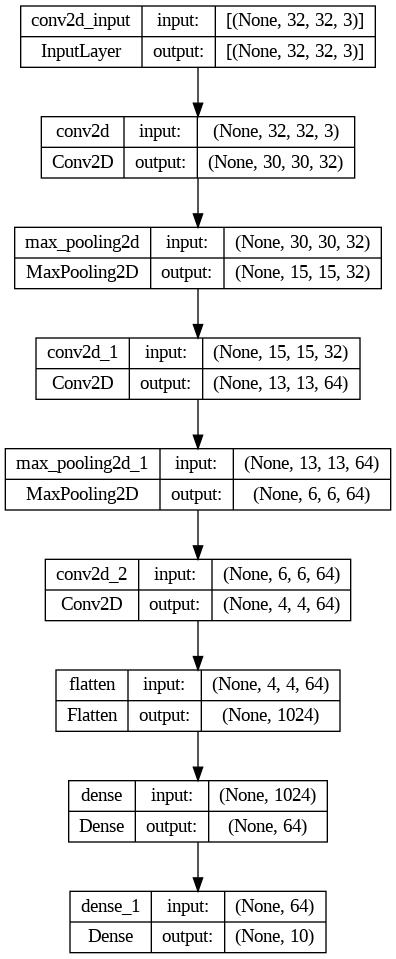

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

# Define the CNN architecture
model = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Convolutional layer 3
    Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output for fully connected layers
    Flatten(),

    # Fully connected layers
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes (example)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to see layers and parameters
model.summary()

# Plot the model architecture and save to file
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Display the model architecture plot
from IPython.display import Image
Image('cnn_model.png')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Steam_Temperature_Input (I  [(None, 32, 32, 1)]          0         []                            
 nputLayer)                                                                                       
                                                                                                  
 Steam_Flow_Rate_Input (Inp  [(None, 32, 32, 1)]          0         []                            
 utLayer)                                                                                         
                                                                                                  
 conv2d_3 (Conv2D)           (None, 30, 30, 32)           320       ['Steam_Temperature_Input[0][0
                                                                    ]']                       

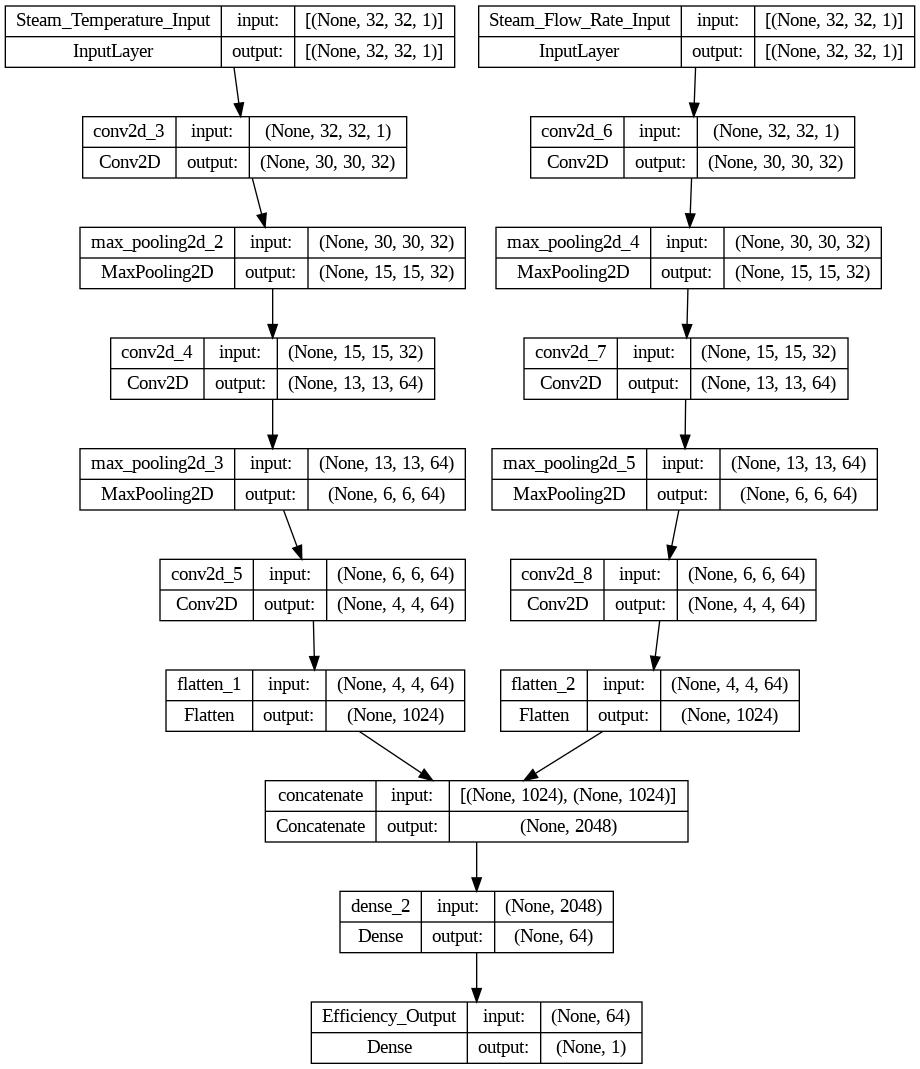

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

# Define input layers for Steam_Temperature and Steam_Flow_Rate
input_temperature = Input(shape=(32, 32, 1), name='Steam_Temperature_Input')  # Assuming shape (32, 32) for example
input_flow_rate = Input(shape=(32, 32, 1), name='Steam_Flow_Rate_Input')  # Assuming shape (32, 32) for example

# Convolutional layers for Steam_Temperature
conv_temperature = Conv2D(32, (3, 3), activation='relu')(input_temperature)
pool_temperature = MaxPooling2D((2, 2))(conv_temperature)
conv_temperature = Conv2D(64, (3, 3), activation='relu')(pool_temperature)
pool_temperature = MaxPooling2D((2, 2))(conv_temperature)
conv_temperature = Conv2D(64, (3, 3), activation='relu')(pool_temperature)
flatten_temperature = Flatten()(conv_temperature)

# Convolutional layers for Steam_Flow_Rate
conv_flow_rate = Conv2D(32, (3, 3), activation='relu')(input_flow_rate)
pool_flow_rate = MaxPooling2D((2, 2))(conv_flow_rate)
conv_flow_rate = Conv2D(64, (3, 3), activation='relu')(pool_flow_rate)
pool_flow_rate = MaxPooling2D((2, 2))(conv_flow_rate)
conv_flow_rate = Conv2D(64, (3, 3), activation='relu')(pool_flow_rate)
flatten_flow_rate = Flatten()(conv_flow_rate)

# Concatenate flattened outputs
concatenated = concatenate([flatten_temperature, flatten_flow_rate])

# Dense layers
dense_layer = Dense(64, activation='relu')(concatenated)
output = Dense(1, name='Efficiency_Output')(dense_layer)  # Output layer for Efficiency

# Define the model
model = Model(inputs=[input_temperature, input_flow_rate], outputs=output)

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Assuming regression task
              metrics=['mae'])  # Mean Absolute Error as additional metric

# Print model summary to see layers and parameters
model.summary()

# Plot the model architecture and save to file
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Display the model architecture plot
from IPython.display import Image
Image('cnn_model.png')


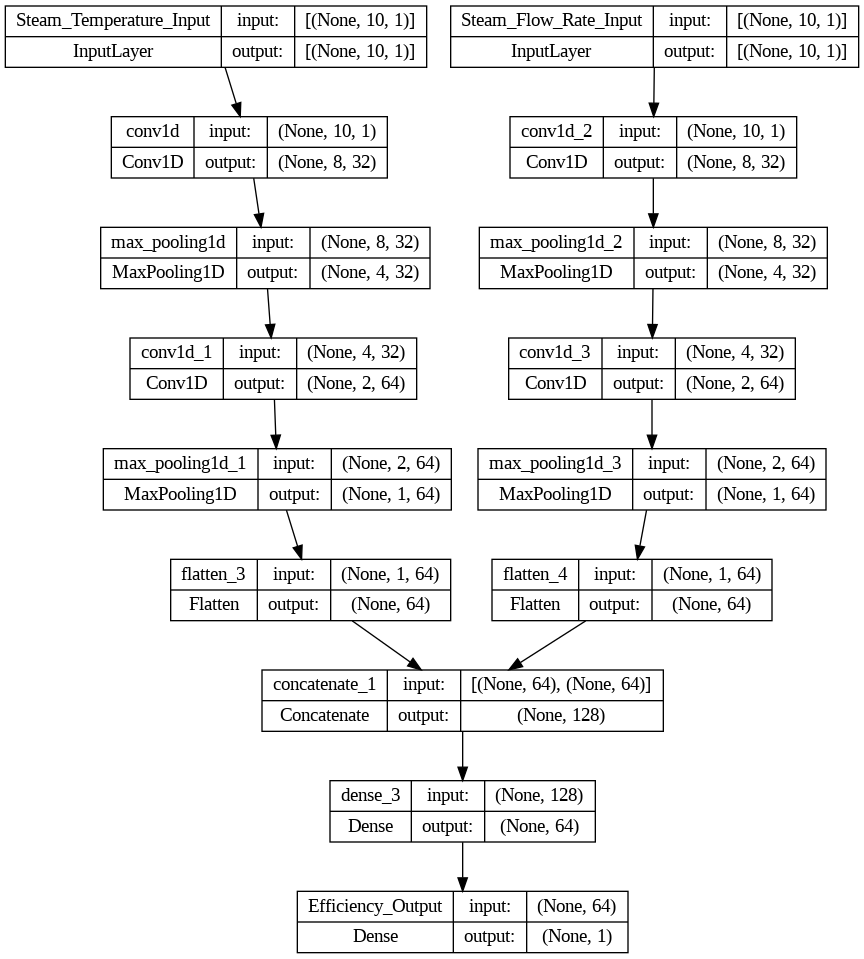

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate
from tensorflow.keras.utils import plot_model

# Define input shapes
input_temperature = Input(shape=(10, 1), name='Steam_Temperature_Input')  # Assuming 10 time steps
input_flow_rate = Input(shape=(10, 1), name='Steam_Flow_Rate_Input')  # Assuming 10 time steps

# Convolutional layers for Steam_Temperature
conv_temperature = Conv1D(32, 3, activation='relu')(input_temperature)
pool_temperature = MaxPooling1D(2)(conv_temperature)
conv_temperature = Conv1D(64, 3, activation='relu')(pool_temperature)
pool_temperature = MaxPooling1D(2)(conv_temperature)
flatten_temperature = Flatten()(pool_temperature)

# Convolutional layers for Steam_Flow_Rate
conv_flow_rate = Conv1D(32, 3, activation='relu')(input_flow_rate)
pool_flow_rate = MaxPooling1D(2)(conv_flow_rate)
conv_flow_rate = Conv1D(64, 3, activation='relu')(pool_flow_rate)
pool_flow_rate = MaxPooling1D(2)(conv_flow_rate)
flatten_flow_rate = Flatten()(pool_flow_rate)

# Concatenate flattened outputs
concatenated = concatenate([flatten_temperature, flatten_flow_rate])

# Dense layers
dense_layer = Dense(64, activation='relu')(concatenated)
output = Dense(1, name='Efficiency_Output')(dense_layer)  # Output layer for Efficiency

# Define the model
model = Model(inputs=[input_temperature, input_flow_rate], outputs=output)

# Plot the model architecture and save to file
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Display the model architecture plot
from IPython.display import Image
Image('cnn_model.png')
